### 1. Install packages

In [1]:
# install.packages("ggplot2")
# install.packages("gridExtra")
# install.packages("ggdendro")
# install.packages("ape")
# install.packages("RColorBrewer")
# install.packages("UpSetR")
# install.packages("vegan")
# install.packages("ggfortify")
# install.packages("ggrepel")
# install.packages("randomForest")
# install.packages("rfUtilities")
# if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
# BiocManager::install("philr")
# BiocManager::install("phyloseq")
# BiocManager::install("ggtree")
# BiocManager::install("ALDEx2")
# BiocManager::install("microbiome")
# install.packages("devtools")
# devtools::install_github('reptalex/phylofactor')
# install.packages("doBy")

### 2. Load libraries

In [2]:
library(ape)
library(phyloseq)
library(philr)
library(ggdendro)
library(ggplot2)
library(RColorBrewer)
library(gridExtra)
library(ggfortify)
library(UpSetR)
library(plyr)
library(vegan)
library(phylofactor)
library(ggtree)
library(ALDEx2)
library(microbiome)
library(randomForest)
library(rfUtilities)
library(tidyverse)
library(ggrepel)

Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun

Loading required package: permute

Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:UpSetR’:

    histogram


This is vegan 2.6-2

Loading required package: magrittr

Loading required package: data.table

Loading required package: Matrix

ggtree v3.2.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

1. Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96
2. Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution. 2018, 35(12):3041-3043. doi:10.1093/molbev/msy194
3. Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R pac

### 3. Load data into R
Load metadata (map.txt), sequence table with no taxonomy information (sequence_table.16s.filtered.txt), taxonomy assignments (taxonomy_L7.txt), and representative sequence tree (rep_set.root.tre)

In [3]:
rawmetadata <- read.table("map.txt", sep="\t", header=T)
seqtab.filtered <- read.table("../01-raw_data_processing/sequence_table.16s.filtered.txt", header=T, row.names=1)
system("sed 's/;/\t/g' ../01-raw_data_processing/taxonomy_L7.txt > tax_for_phyloseq.txt")
taxa <- read.table("tax_for_phyloseq.txt", header=F, sep="\t", row.names=1)
tree <- read.tree("../01-raw_data_processing/rep_set.root.tre")

Check to see if same samples in metadata and sequence table

In [4]:
notinmeta <- setdiff(row.names(seqtab.filtered), rawmetadata$SampleID)
notinraw <- setdiff(rawmetadata$SampleID, row.names(seqtab.filtered))
notinmeta
notinraw

character(0)

character(0)

Now create a phyloseq object from different files

In [5]:
rownames(rawmetadata) <- rawmetadata$SampleID
ps.dat <- phyloseq(otu_table(seqtab.filtered, taxa_are_rows=F), sample_data(rawmetadata), tax_table(as.matrix(taxa)), tree)
ps.dat

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2879 taxa and 58 samples ]
sample_data() Sample Data:       [ 58 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 2879 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2879 tips and 2878 internal nodes ]

### 4. PhILR transformation

In [6]:
ps.dat.nocont <- subset_samples(ps.dat, Sample.type=="swab")
philr.dat <- transform_sample_counts(ps.dat.nocont, function(x) x+1) #add pseudocount of one to OTUs to avoid log-ratios involving zeros
is.rooted(phy_tree(philr.dat)) #check that tree is rooted
is.binary.tree(phy_tree(philr.dat)) #check that multichotomies are resolved in tree
phy_tree(philr.dat) <- makeNodeLabel(phy_tree(philr.dat), method="number", prefix="n")
otu.table <- otu_table(philr.dat)
tree <- phy_tree(philr.dat)
metadata <- sample_data(philr.dat)
tax <- tax_table(philr.dat)
philr.t <- philr(otu.table, tree, part.weights="enorm.x.gm.counts", ilr.weights="blw.sqrt")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’



[1] TRUE

is.binary.tree() is deprecated; using is.binary() instead.

is.binary.tree() will be removed soon: see ?is.binary and update your code.



[1] TRUE

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Building Sequential Binary Partition from Tree...

Building Contrast Matrix...

Transforming the Data...

Calculating ILR Weights...



### 5. Heirarchical cluster dendrogram from transformed data

pdf 
  2

pdf 
  2

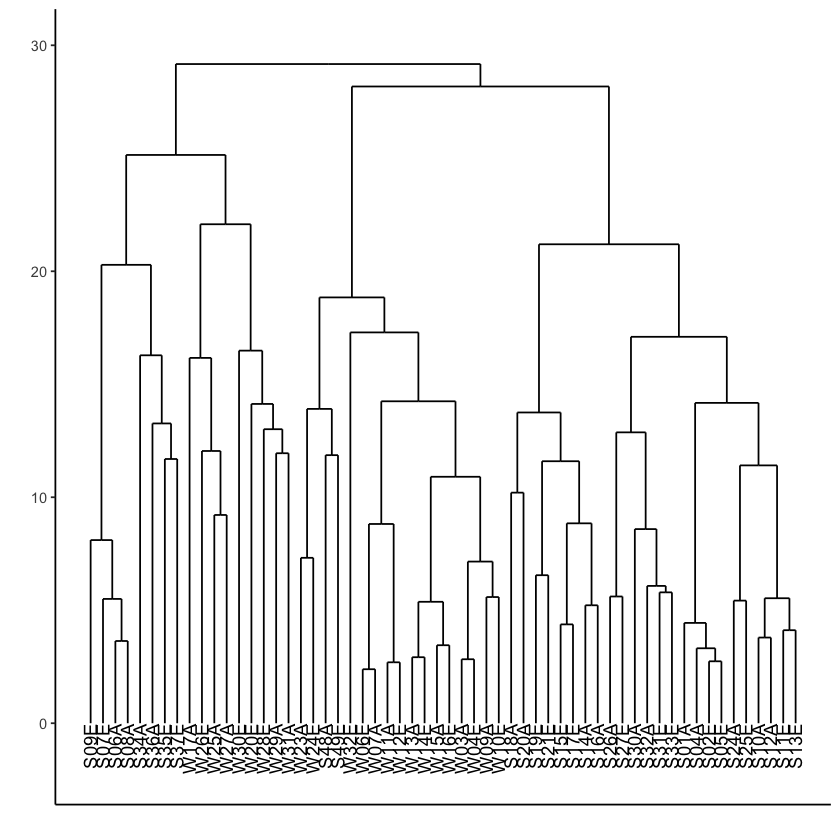

In [7]:
system("mkdir imgs")
hc <- hclust(dist(philr.t), method="complete")
df2 <- data.frame(cluster=cutree(hc,5), states=factor(hc$labels, levels=hc$labels[hc$order])) # get cluster assocaited with each sample
write.table(df2, "philr_cluster.txt", quote=F, sep="\t", col.names=NA)
hcd <- as.dendrogram(hc)
dend_data <- dendro_data(hcd, type="rectangle")
cols <- brewer.pal(6, "Set2")
tip_labels <- as.vector(dend_data$labels$label)
png("imgs/philr_dendrogram_season.png")
ggplot(dend_data$segments) + geom_segment(aes(x=x,y=y, xend=xend, yend=yend)) + theme_classic() + geom_text(data = dend_data$labels, aes(x, y, label = label, hjust = 1, angle = 90)) + ylim(-2,30) + xlab("") + ylab("") + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) 
dev.off()
pdf("imgs/philr_dendrogram_season.pdf")
ggplot(dend_data$segments) + geom_segment(aes(x=x,y=y, xend=xend, yend=yend)) + theme_classic() + geom_text(data = dend_data$labels, aes(x, y, label = label, hjust = 1, angle = 90)) + ylim(-2,30) + xlab("") + ylab("") + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) 
dev.off()
merge <- merge(df2, rawmetadata, by.x=c("states"), by.y=c("SampleID"))
ggplot(dend_data$segments) + geom_segment(aes(x=x,y=y, xend=xend, yend=yend)) + theme_classic() + geom_text(data = dend_data$labels, aes(x, y, label = label, hjust = 1, angle = 90)) + ylim(-2,30) + xlab("") + ylab("") + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) 

### 6. PCA of PhILR distances

pdf 
  2

pdf 
  2

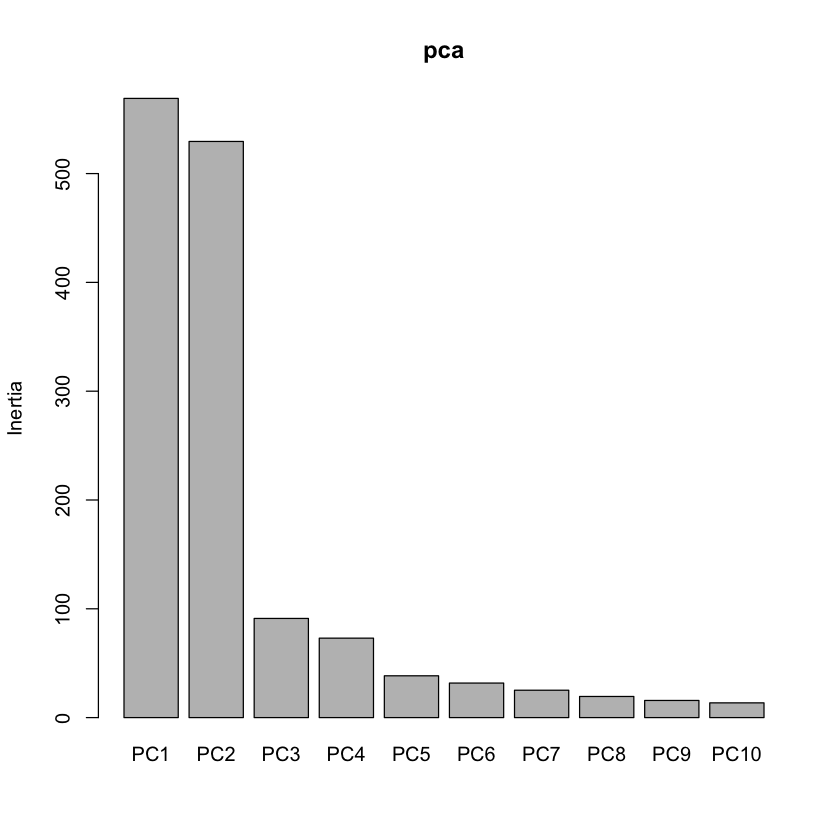

pdf 
  2

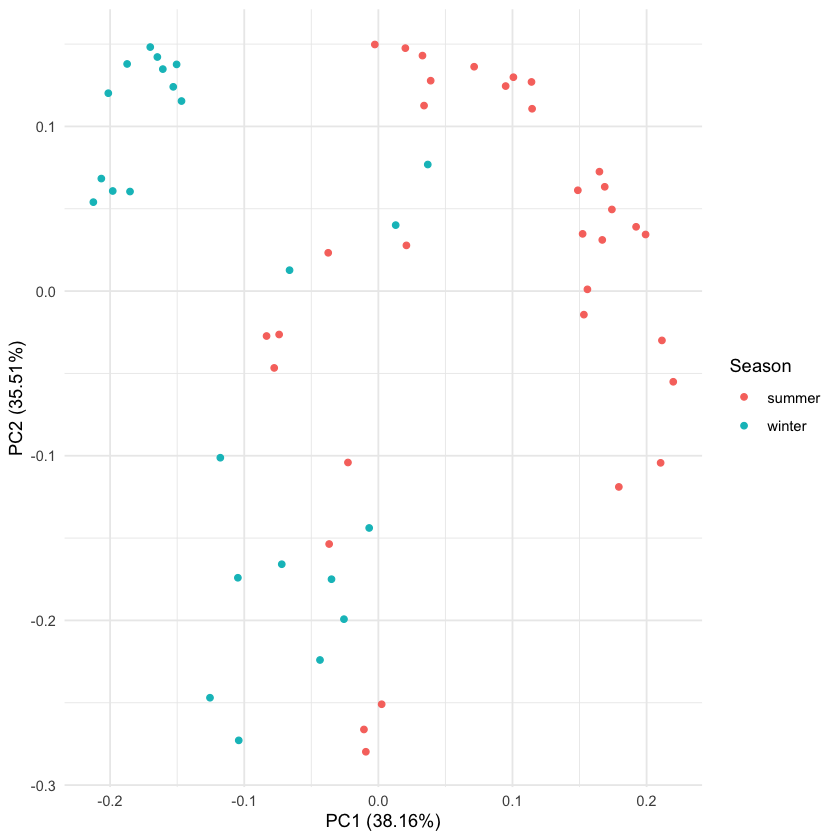

pdf 
  2

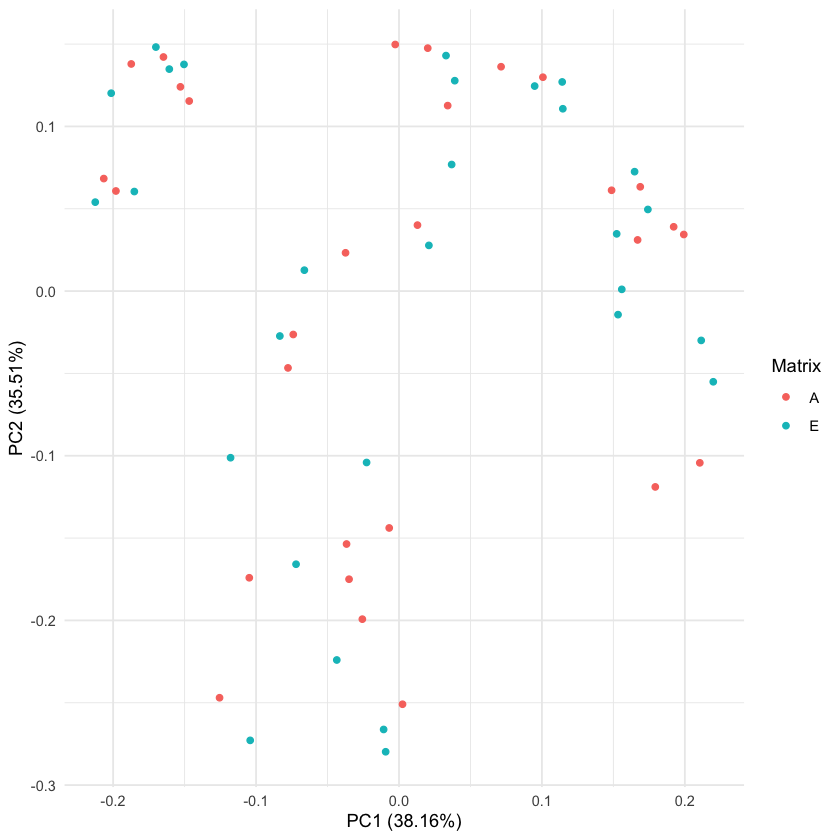

pdf 
  2

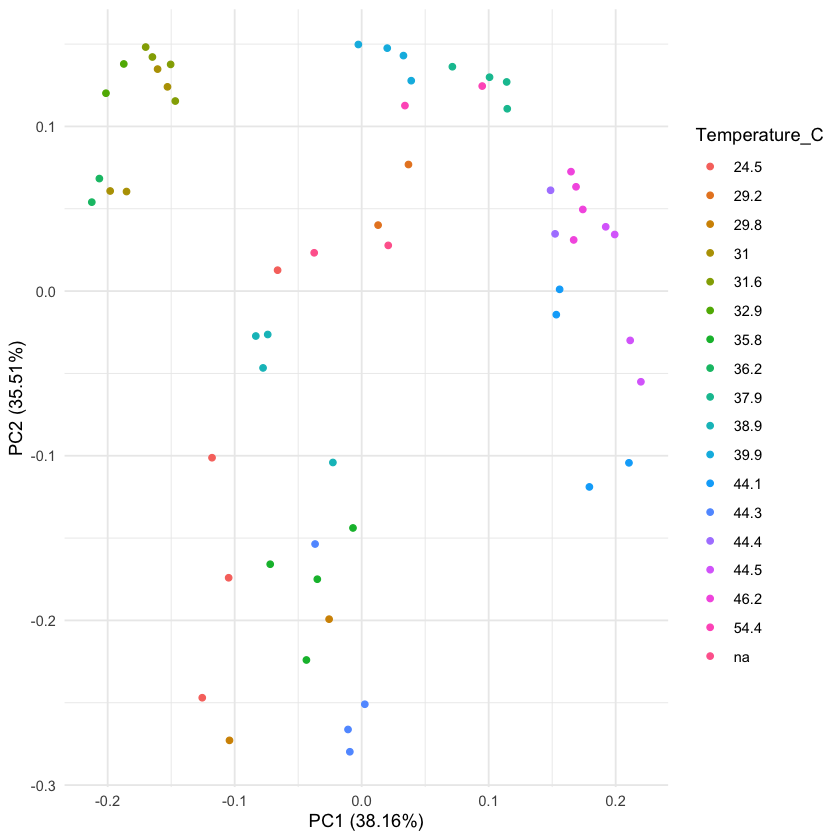

pdf 
  2

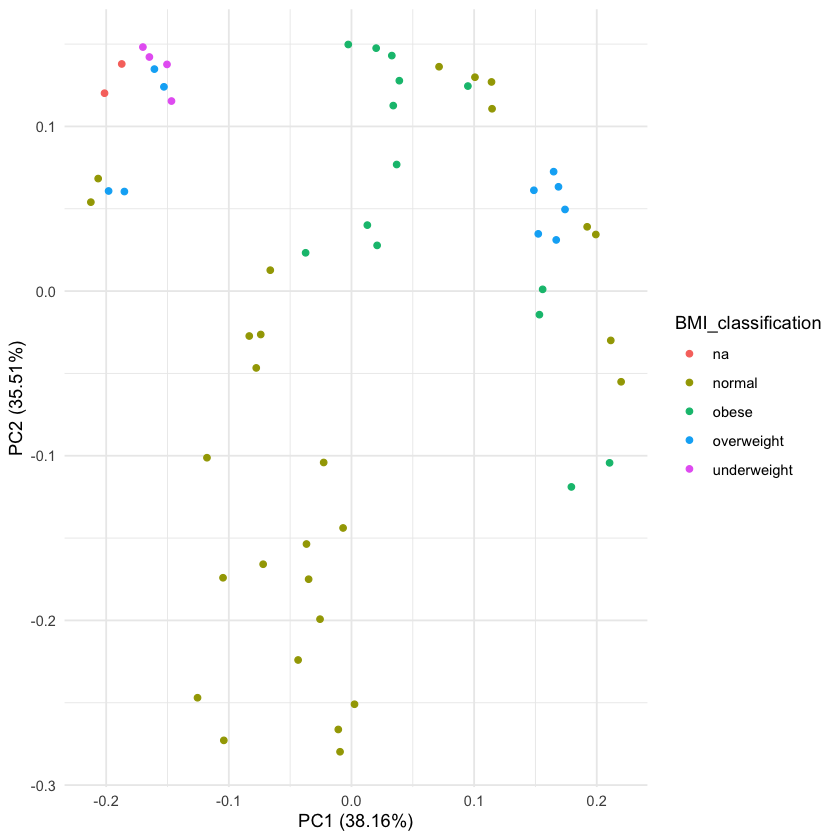

pdf 
  2

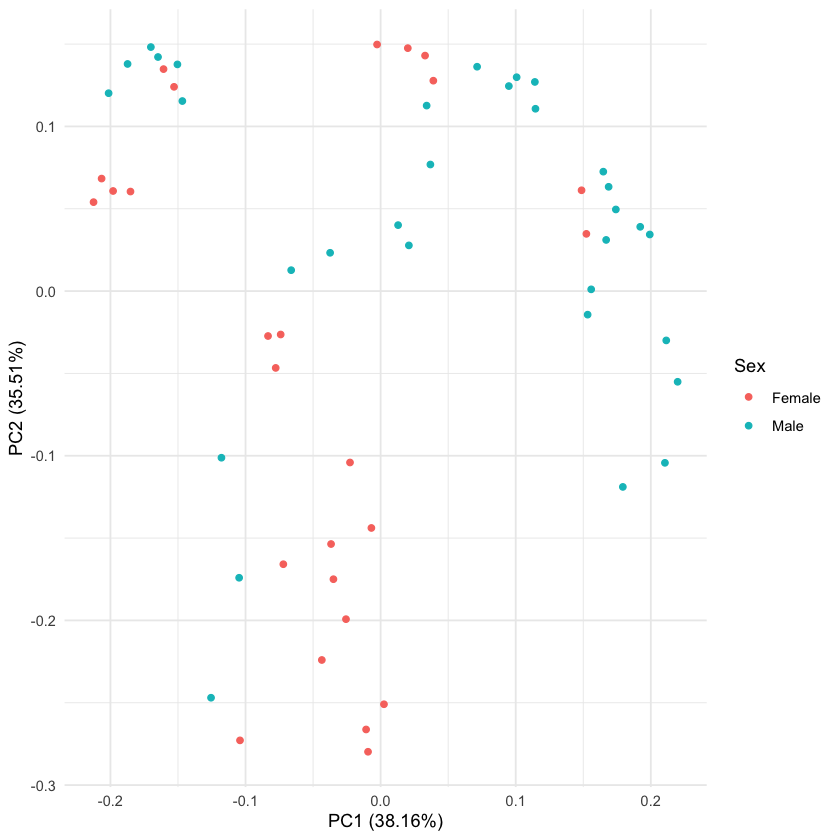

pdf 
  2

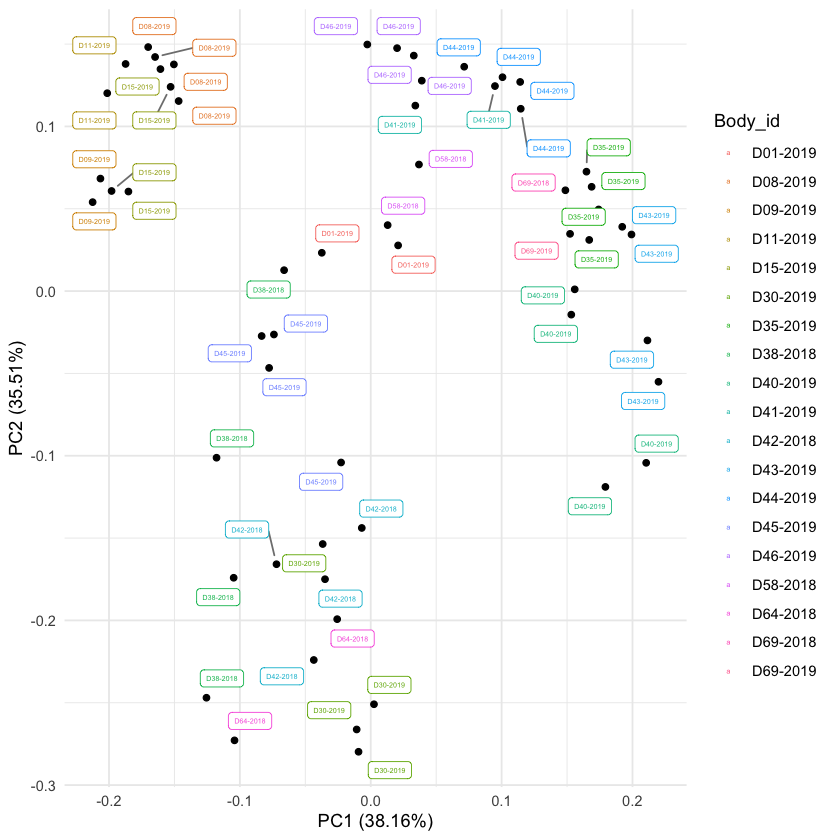

In [8]:
philr.dist <- dist(philr.t, method="euclidean")
pca <- prcomp(as.matrix(philr.dist))
png("imgs/philr_screeplot.png")
screeplot(pca)
dev.off()
screeplot(pca)

png("imgs/pca_season.png")
autoplot(pca, data=sample_data(ps.dat.nocont), colour="Season") + theme_minimal() 
dev.off()
autoplot(pca, data=sample_data(ps.dat.nocont), colour="Season") + theme_minimal() 

png("imgs/pca_matrix.png")
autoplot(pca, data=sample_data(ps.dat.nocont), colour="Matrix") + theme_minimal() 
dev.off()
autoplot(pca, data=sample_data(ps.dat.nocont), colour="Matrix") + theme_minimal() 

png("imgs/pca_temp.png")
autoplot(pca, data=sample_data(ps.dat.nocont), colour="Temperature_C") + theme_minimal() 
dev.off()
autoplot(pca, data=sample_data(ps.dat.nocont), colour="Temperature_C") + theme_minimal() 

png("imgs/pca_bmi.png")
autoplot(pca, data=sample_data(ps.dat.nocont), colour="BMI_classification") + theme_minimal() 
dev.off()
autoplot(pca, data=sample_data(ps.dat.nocont), colour="BMI_classification") + theme_minimal() 

png("imgs/pca_sex.png")
autoplot(pca, data=sample_data(ps.dat.nocont), colour="Sex") + theme_minimal() 
dev.off()
autoplot(pca, data=sample_data(ps.dat.nocont), colour="Sex") + theme_minimal() 

png("imgs/pca_bodyID.png")
autoplot(pca, data=sample_data(ps.dat.nocont)) + theme_minimal() + geom_label_repel(aes(label=Body_id, colour=Body_id), box.padding=0.35, point.padding=0.5, segment.color='grey50', max.overlaps=15, cex=1.5)
dev.off()
autoplot(pca, data=sample_data(ps.dat.nocont)) + theme_minimal() + geom_label_repel(aes(label=Body_id, colour=Body_id), box.padding=0.35, point.padding=0.5, segment.color='grey50', max.overlaps=15, cex=1.5)

pdf("imgs/pca_bodyID.pdf")
autoplot(pca, data=sample_data(ps.dat.nocont)) + theme_minimal() + geom_label_repel(aes(label=Body_id, colour=Body_id), box.padding=0.35, point.padding=0.5, segment.color='grey50', max.overlaps=15, cex=1.5)
dev.off()

Colored by surface temperature?

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


pdf 
  2

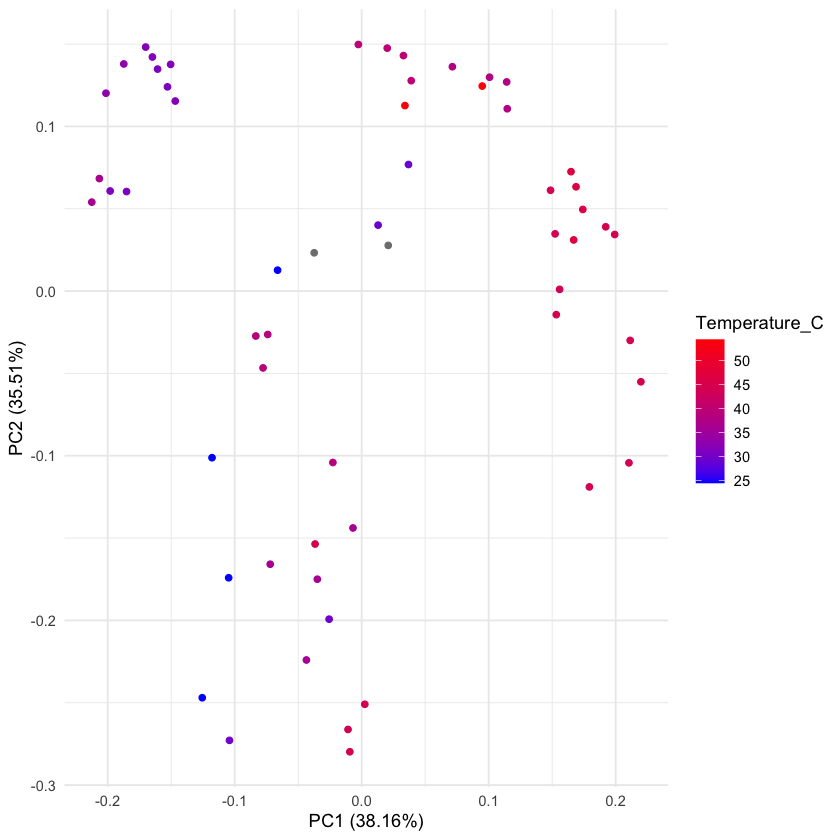

In [9]:
temp <- sample_data(ps.dat.nocont)
temp$Temperature_C <- as.numeric(as.character(temp$Temperature_C))
png("imgs/pca_temperature_cont.png")
autoplot(pca, data=temp, colour="Temperature_C") + theme_minimal() + scale_color_gradient(low="blue",high="red")
dev.off()
autoplot(pca, data=temp, colour="Temperature_C") + theme_minimal() + scale_color_gradient(low="blue",high="red")

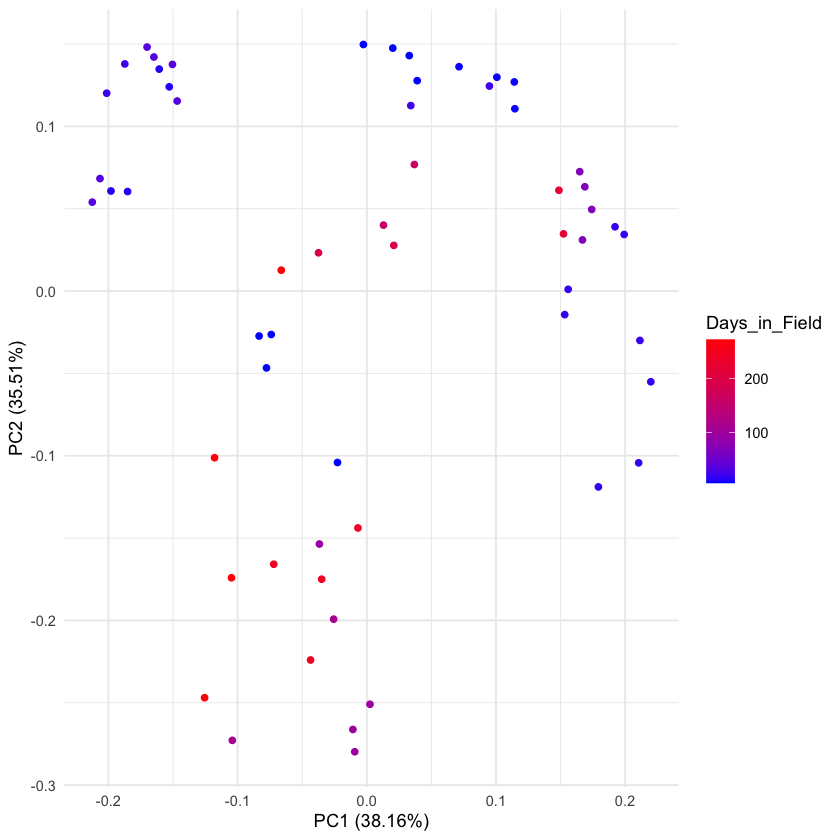

In [69]:
# by days in field
temp <- sample_data(ps.dat.nocont)
temp$Days_in_Field <- as.numeric(as.character(temp$Days_in_Field))

autoplot(pca, data=temp, colour="Days_in_Field") + theme_minimal() + scale_color_gradient(low="blue",high="red")

# png("imgs/pca_days_in_field.png")
# autoplot(pca, data=temp, colour="Days_in_Field") + theme_minimal() + scale_color_gradient(low="blue",high="red")
# dev.off()

### 7. Bray-Curtis biplot

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’



Square root transformation
Wisconsin double standardization
Run 0 stress 0.1631096 
Run 1 stress 0.159254 
... New best solution
... Procrustes: rmse 0.04398183  max resid 0.1588622 
Run 2 stress 0.1653999 
Run 3 stress 0.1592391 
... New best solution
... Procrustes: rmse 0.003933204  max resid 0.02687796 
Run 4 stress 0.1654133 
Run 5 stress 0.2014324 
Run 6 stress 0.1654133 
Run 7 stress 0.159239 
... New best solution
... Procrustes: rmse 8.926029e-05  max resid 0.0004776033 
... Similar to previous best
Run 8 stress 0.1660059 
Run 9 stress 0.1654133 
Run 10 stress 0.1654 
Run 11 stress 0.1654133 
Run 12 stress 0.1654133 
Run 13 stress 0.1630872 
Run 14 stress 0.2135665 
Run 15 stress 0.1667591 
Run 16 stress 0.159239 
... New best solution
... Procrustes: rmse 2.894016e-05  max resid 0.0001663265 
... Similar to previous best
Run 17 stress 0.1667607 
Run 18 stress 0.159239 
... Procrustes: rmse 1.498142e-05  max resid 7.880626e-05 
... Similar to previous best
Run 19 stress 0.1667

pdf 
  2

pdf 
  2

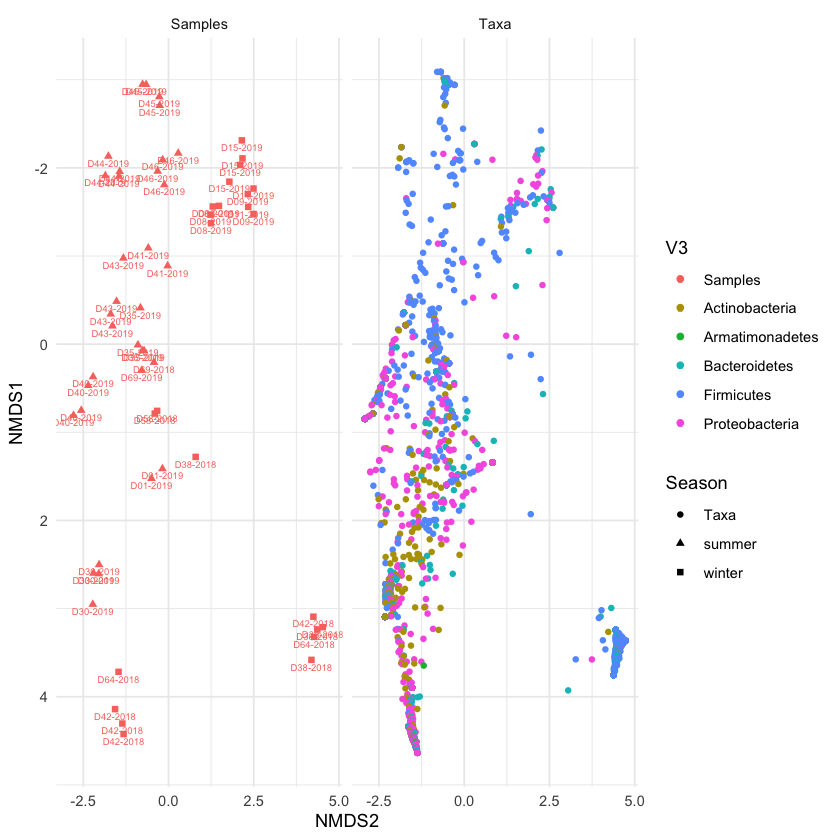

In [10]:
phylum.sum <- tapply(taxa_sums(ps.dat.nocont), tax_table(ps.dat.nocont)[,"V3"], sum, na.rm=T)
top6phyla <- names(sort(phylum.sum, T))[1:5]
ps1 <- prune_taxa((tax_table(ps.dat.nocont)[,"V3"] %in% top6phyla), ps.dat.nocont)
ps1.ord <- ordinate(ps1, "NMDS", "bray")
pdf("biplot.pdf")
plot_ordination(ps1, ps1.ord, type="split", color="V3", label="Body_id", shape="Season") + theme_minimal() + coord_flip() + scale_x_reverse()
dev.off()
plot_ordination(ps1, ps1.ord, type="split", color="V3", label="Body_id", shape="Season") + theme_minimal() + coord_flip() + scale_x_reverse()

png("biplot.png")
plot_ordination(ps1, ps1.ord, type="split", color="V3", label="Body_id", shape="Season") + theme_minimal() + coord_flip() + scale_x_reverse()
dev.off()

### 8. Upset Plot
How many ASVs are shared between groups?

pdf 
  2

pdf 
  2

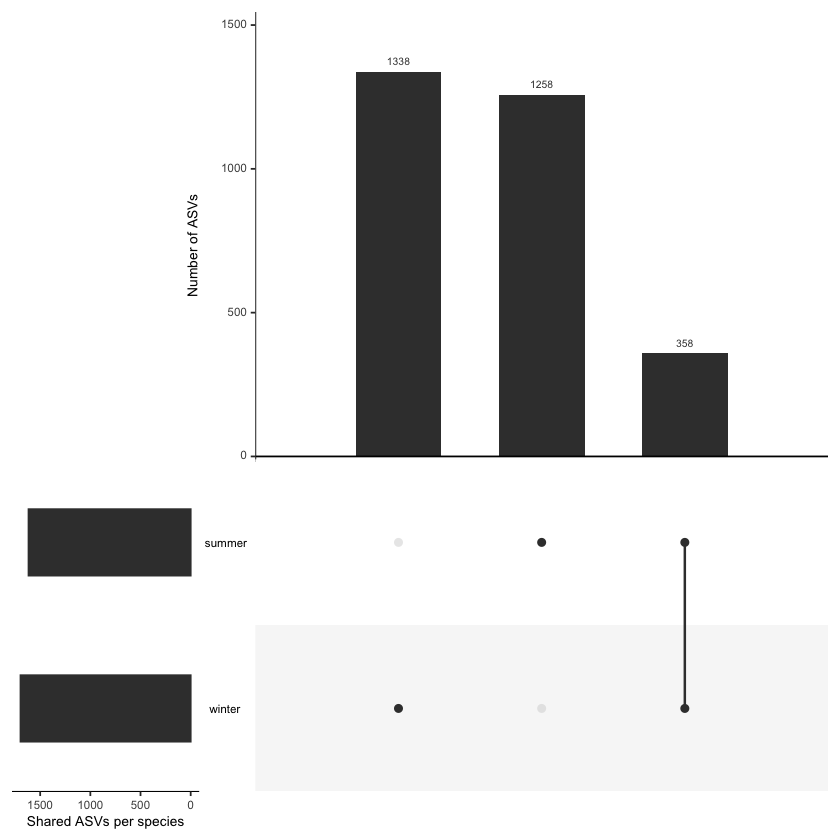

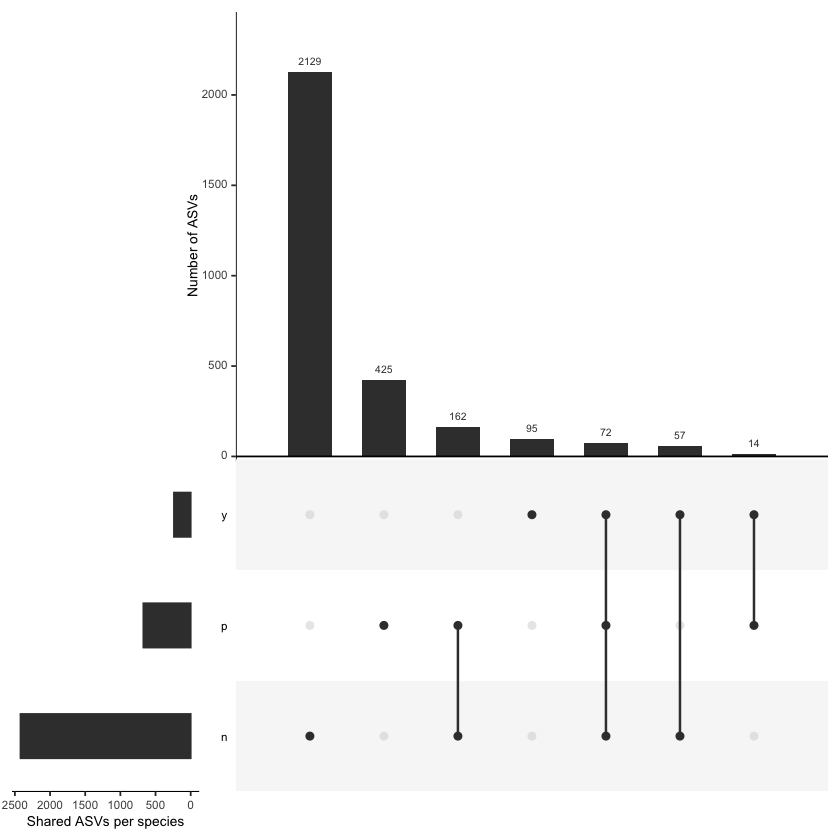

In [11]:
map <- as.matrix(read.table("map.txt", header=T, sep="\t", row.names=1))
merged <- merge(seqtab.filtered, map, by="row.names")
n <- ncol(seqtab.filtered) + 1
agg <- aggregate(merged[,2:n], by=list(merged$Season), FUN=sum) # first by season
#remove columns with only zeros
agg <- agg[,colSums(agg !=0) > 0]
rownames(agg) <- agg$Group.1
#convert to presence absence table -- ignore warnining message, still works
agg[agg>1] <- 1
#transpose again
agg <- data.frame(t(agg[,-1]))
png("imgs/upset_seqson.png")
upset(agg, order.by="freq", mainbar.y.label="Number of ASVs", sets.x.label="Shared ASVs per species", mb.ratio = c(0.55, 0.45))
dev.off()
upset(agg, order.by="freq", mainbar.y.label="Number of ASVs", sets.x.label="Shared ASVs per species", mb.ratio = c(0.55, 0.45))

agg <- aggregate(merged[,2:n], by=list(merged$Insects), FUN=sum) # by insect status
#remove columns with only zeros
agg <- agg[,colSums(agg !=0) > 0]
rownames(agg) <- agg$Group.1
#convert to presence absence table -- ignore warnining message, still works
agg[agg>1] <- 1
#transpose again
agg <- data.frame(t(agg[,-1]))
png("imgs/upset_insects.png")
upset(agg, order.by="freq", mainbar.y.label="Number of ASVs", sets.x.label="Shared ASVs per species", mb.ratio = c(0.55, 0.45))
dev.off()
upset(agg, order.by="freq", mainbar.y.label="Number of ASVs", sets.x.label="Shared ASVs per species", mb.ratio = c(0.55, 0.45))

### 9. Taxonomic summary
Abundance and taxonomic composition

pdf 
  2

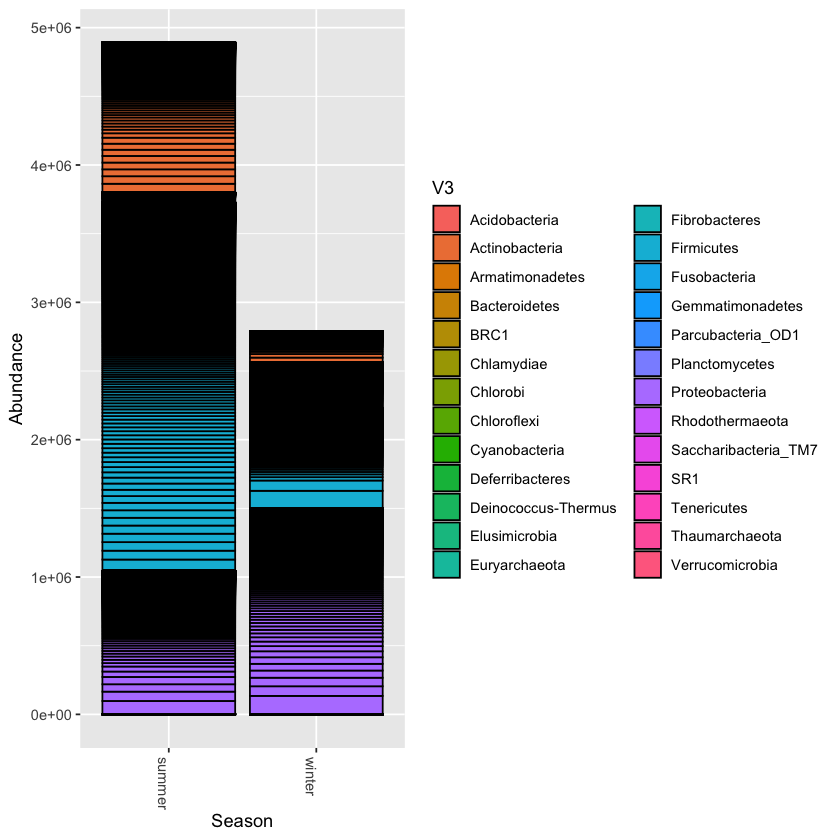

In [12]:
png("imgs/abundance_tax_barplot.png")
plot_bar(ps.dat, "Season", fill=rank_names(ps.dat)[2])
dev.off()
plot_bar(ps.dat, "Season", fill=rank_names(ps.dat)[2])

Hard to interpret, collapse low abundance phyla into "other" category

In [13]:
physeq.2 <- filter_taxa(ps.dat.nocont, function(x) mean(x) > 0.1, TRUE) # remove low freq ASVs
physeq.3 <- transform_sample_counts(physeq.2, function(x) x/sum(x)) # get relative abundance
glom <- tax_glom(physeq.3, taxrank=rank_names(physeq.3)[2]) # collapse at phylum level
data <- psmelt(glom) # create dataframe from phyloseq object
data$V3 <- as.character(data$V3) # convert to character
data$V3[data$Abundance < 0.01] <- "< 1% abund" # rename low freq phyla
medians <- ddply(data, ~V3, function(x) c(median=median(x$Abundance)))
medians

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namesp

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; 

V3,median
<chr>,<dbl>
< 1% abund,0.00000000
Actinobacteria,0.11948640
Armatimonadetes,0.04146412
Bacteroidetes,0.07630162
Deferribacteres,0.01073772
Firmicutes,0.52327533
Proteobacteria,0.19213305
Tenericutes,0.01108594


pdf 
  2

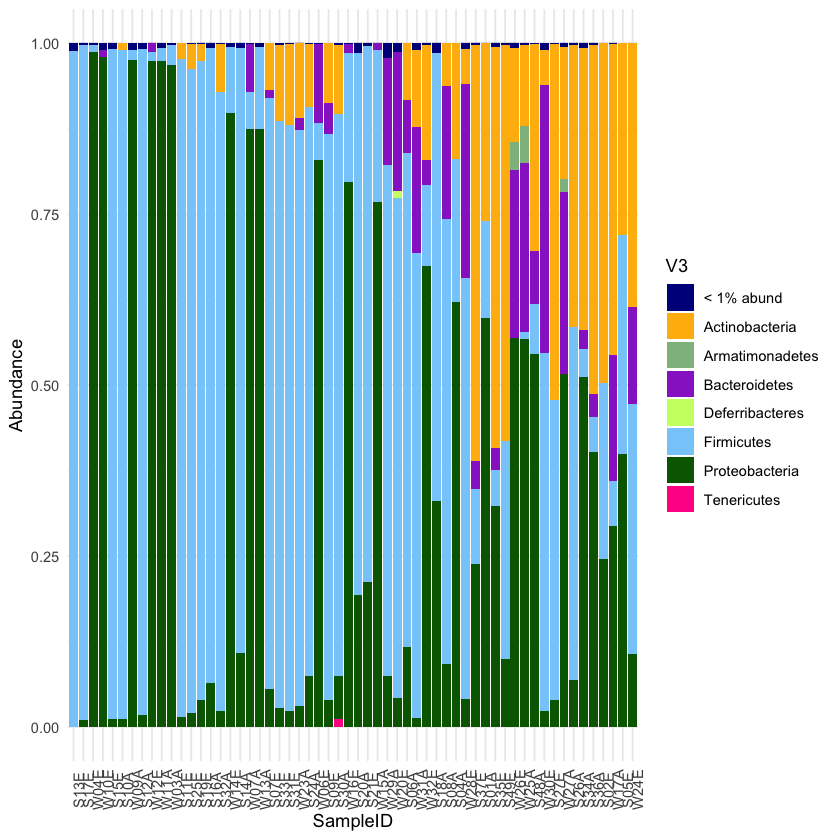

In [14]:
data$SampleID <- factor(data$SampleID, levels=unique(data$SampleID))
png("imgs/taxonomy_barchart.png")
ggplot(data, aes(x=SampleID, y=Abundance, fill=V3)) + geom_bar(aes(), stat="identity", position="stack") + scale_fill_manual(values = c("darkblue", "darkgoldenrod1", "darkseagreen", "darkorchid", "darkolivegreen1", "lightskyblue", "darkgreen", "deeppink")) + theme_minimal() + theme(axis.text.x = element_text(angle = 90))
dev.off()
ggplot(data, aes(x=SampleID, y=Abundance, fill=V3)) + geom_bar(aes(), stat="identity", position="stack") + scale_fill_manual(values = c("darkblue", "darkgoldenrod1", "darkseagreen", "darkorchid", "darkolivegreen1", "lightskyblue", "darkgreen", "deeppink")) + theme_minimal() + theme(axis.text.x = element_text(angle = 90))

### 10. Alpha diversity

pdf 
  2

pdf 
  2

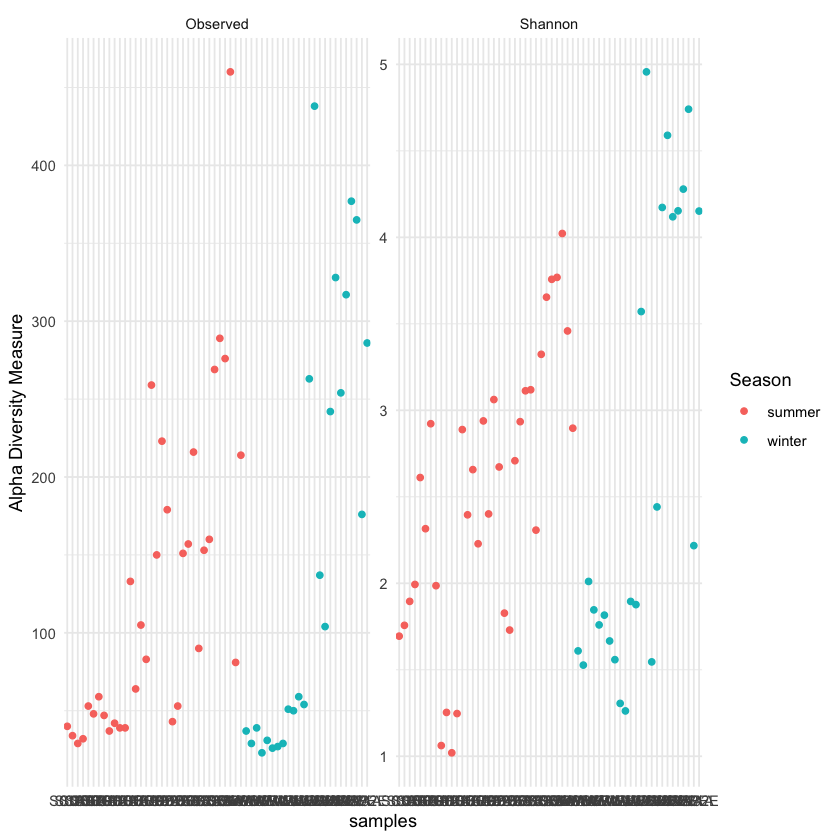

Warning message in wilcox.test.default(adiv[grepl("W", rownames(adiv)), ]$Observed, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  adiv[grepl("W", rownames(adiv)), ]$Observed and adiv[grepl("S", rownames(adiv)), ]$Observed
W = 407, p-value = 0.9937
alternative hypothesis: true location shift is not equal to 0


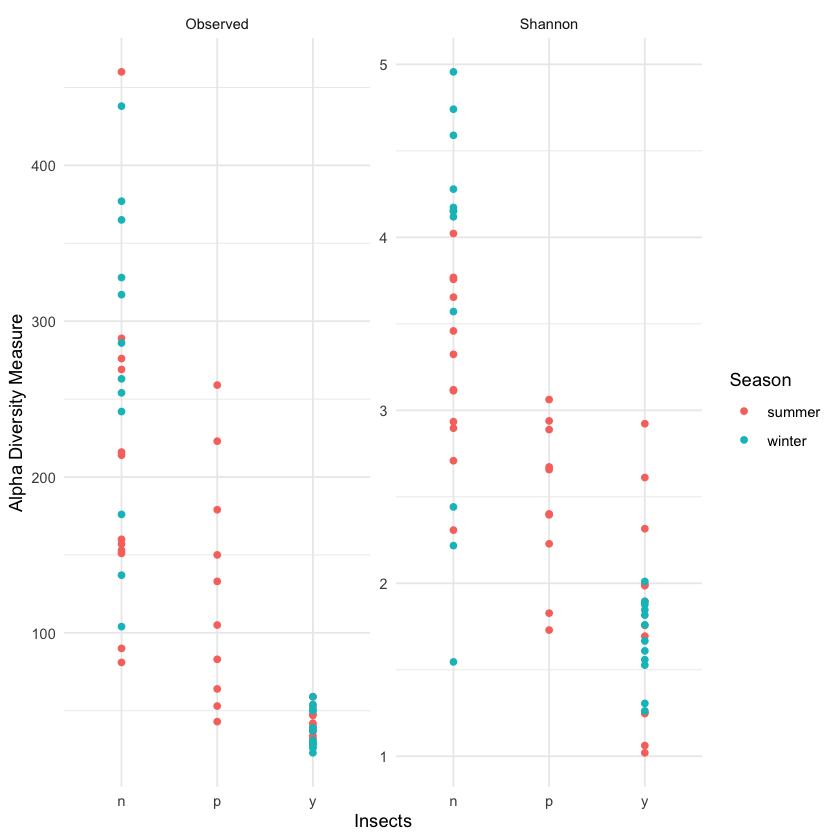

In [15]:
png("imgs/adiv_allsamp.png")
plot_richness(ps.dat.nocont, measures=c("Observed", "Shannon"), color="Season") + theme_minimal()
dev.off()
plot_richness(ps.dat.nocont, measures=c("Observed", "Shannon"), color="Season") + theme_minimal()

png("imgs/adiv_insect_season.png")
plot_richness(ps.dat.nocont, x="Insects", color="Season", measures=c("Observed", "Shannon")) + theme_minimal()
dev.off()
plot_richness(ps.dat.nocont, x="Insects", color="Season", measures=c("Observed", "Shannon")) + theme_minimal()

adiv <- estimate_richness(ps.dat.nocont)
wilcox.test(adiv[grepl("W", rownames(adiv)),]$Observed, adiv[grepl("S", rownames(adiv)),]$Observed)

Warning message in plot_richness(ps.dat, x = "Days_in_Field", measures = c("Observed", :
“`sortby` argument provided, but `x` not a discrete variable. `sortby` is ignored.”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'



pdf 
  2

Warning message in plot_richness(ps.dat, x = "Days_in_Field", measures = c("Observed", :
“`sortby` argument provided, but `x` not a discrete variable. `sortby` is ignored.”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'



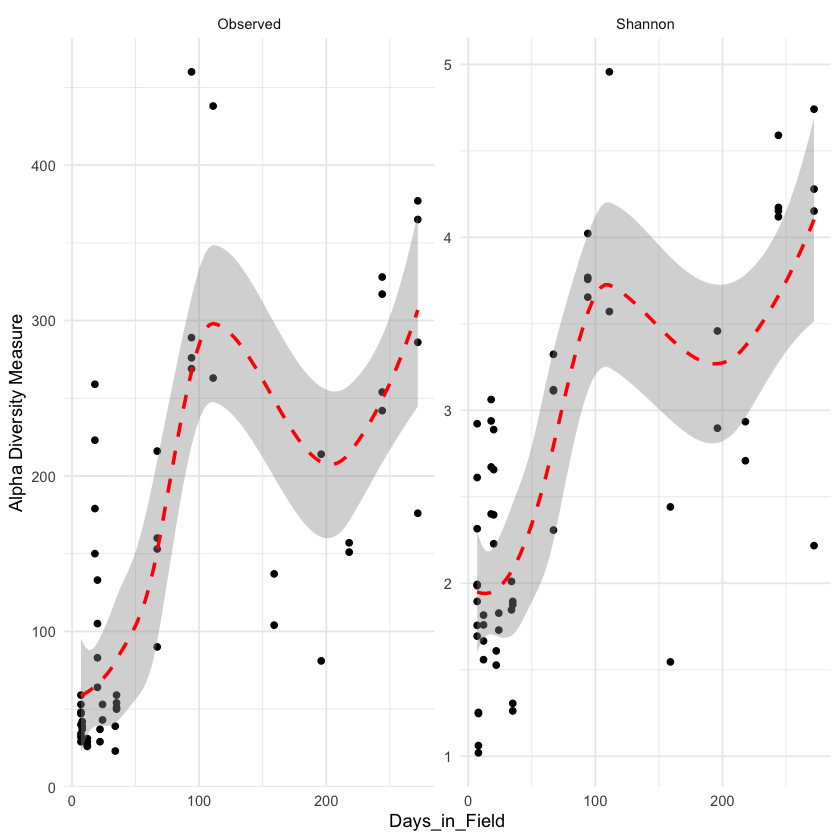

In [16]:
# diversity over time in field
pdf("adiv_days_in_field.pdf")
plot_richness(ps.dat, x = "Days_in_Field", measures=c("Observed", "Shannon"), sortby = "Shannon") + theme_minimal() + geom_smooth(linetype = 2, colour = "red")
dev.off()
plot_richness(ps.dat, x = "Days_in_Field", measures=c("Observed", "Shannon"), sortby = "Shannon") + theme_minimal() + geom_smooth(linetype = 2, colour = "red")

### 11. PERMANOVA analysis
Are there significant differences in microbial diversity/composition across samples by metadata category?

In [17]:
metadata <- as(sample_data(ps.dat.nocont), "data.frame")
adonis2(philr.dist ~ Season, data=metadata)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Season,1,1827.050,0.1773872,12.07577,0.001
Residual,56,8472.735,0.8226128,NA,NA
Total,57,10299.785,1.0000000,NA,NA


In [18]:
adonis2(philr.dist ~ Matrix, data=metadata)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Matrix,1,59.83644,0.005809485,0.3272322,0.991
Residual,56,10239.94849,0.994190515,NA,NA
Total,57,10299.78493,1.000000000,NA,NA


In [19]:
adonis2(philr.dist ~ Insects, data=metadata)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Insects,2,2410.752,0.2340585,8.403524,0.001
Residual,55,7889.033,0.7659415,NA,NA
Total,57,10299.785,1.0000000,NA,NA


In [20]:
adonis2(philr.dist ~ Temp_group, data=metadata)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Temp_group,4,2803.962,0.272235,4.956428,0.001
Residual,53,7495.823,0.727765,NA,NA
Total,57,10299.785,1.000000,NA,NA


In [21]:
adonis2(philr.dist ~ Sex, data=metadata)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sex,1,885.2381,0.08594724,5.26561,0.001
Residual,56,9414.5468,0.91405276,NA,NA
Total,57,10299.7849,1.00000000,NA,NA


In [22]:
adonis2(philr.dist ~ BMI_classification, data=metadata)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BMI_classification,4,2187.290,0.2123627,3.572464,0.001
Residual,53,8112.495,0.7876373,NA,NA
Total,57,10299.785,1.0000000,NA,NA


Effect of different metadata categories within season

In [23]:
# filter on season
ps.dat.summer <- subset_samples(ps.dat, Season=="summer")
ps.dat.winter <- subset_samples(ps.dat, Season=="winter")
# get distance matrix for each
philr.dat.summer <- transform_sample_counts(ps.dat.summer, function(x) x+1) #add pseudocount of one to OTUs to avoid log-ratios involving zeros
phy_tree(philr.dat.summer) <- makeNodeLabel(phy_tree(philr.dat.summer), method="number", prefix="n")
otu.table.summer <- otu_table(philr.dat.summer)
tree.summer <- phy_tree(philr.dat.summer)
metadata.summer <- as(sample_data(ps.dat.summer), "data.frame")
tax.summer <- tax_table(philr.dat.summer)
philr.t.summer <- philr(otu.table.summer, tree.summer, part.weights="enorm.x.gm.counts", ilr.weights="blw.sqrt")
philr.dist.summer <- dist(philr.t.summer, method="euclidean")
# winter
philr.dat.winter <- transform_sample_counts(ps.dat.winter, function(x) x+1) #add pseudocount of one to OTUs to avoid log-ratios involving zeros
phy_tree(philr.dat.winter) <- makeNodeLabel(phy_tree(philr.dat.winter), method="number", prefix="n")
otu.table.winter <- otu_table(philr.dat.winter)
tree.winter <- phy_tree(philr.dat.winter)
metadata.winter <- as(sample_data(ps.dat.winter), "data.frame")
tax.winter <- tax_table(philr.dat.winter)
philr.t.winter <- philr(otu.table.winter, tree.winter, part.weights="enorm.x.gm.counts", ilr.weights="blw.sqrt")
philr.dist.winter <- dist(philr.t.winter, method="euclidean")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namesp

Testing insect presence, temperature group, sex, and BMI classification within season. Only significant results reported below

In [24]:
adonis2(philr.dist.summer ~ Insects, data = metadata.summer)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Insects,2,2908.418,0.1748835,3.285227,0.002
Residual,31,13722.184,0.8251165,NA,NA
Total,33,16630.602,1.0000000,NA,NA


In [25]:
adonis2(philr.dist.summer ~ Temp_group, data=metadata.summer)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Temp_group,3,4086.243,0.2457063,3.257435,0.002
Residual,30,12544.359,0.7542937,NA,NA
Total,33,16630.602,1.0000000,NA,NA


In [26]:
adonis2(philr.dist.summer ~ Sex, data = metadata.summer)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sex,1,3362.345,0.2021782,8.109208,0.001
Residual,32,13268.257,0.7978218,NA,NA
Total,33,16630.602,1.0000000,NA,NA


In [27]:
adonis2(philr.dist.summer ~ BMI_classification, data = metadata.summer)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BMI_classification,2,2943.025,0.1769645,3.332722,0.002
Residual,31,13687.577,0.8230355,NA,NA
Total,33,16630.602,1.0000000,NA,NA


Now look at groups during winter

In [28]:
adonis2(philr.dist.winter ~ Insects, data = metadata.winter)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Insects,1,3184.328,0.4858578,20.78972,0.001
Residual,22,3369.705,0.5141422,NA,NA
Total,23,6554.033,1.0000000,NA,NA


In [29]:
adonis2(philr.dist.winter ~ Temp_group, data=metadata.winter)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Temp_group,1,1225.958,0.1870541,5.06207,0.007
Residual,22,5328.075,0.8129459,NA,NA
Total,23,6554.033,1.0000000,NA,NA


In [30]:
adonis2(philr.dist.winter ~ BMI_classification, data = metadata.winter)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BMI_classification,4,2817.965,0.4299589,3.582733,0.001
Residual,19,3736.068,0.5700411,NA,NA
Total,23,6554.033,1.0000000,NA,NA


### 12. Beta dispersion tests

In [31]:
dispr <- vegan::betadisper(philr.dist, phyloseq::sample_data(ps.dat.nocont)$Season)
dispr


	Homogeneity of multivariate dispersions

Call: vegan::betadisper(d = philr.dist, group =
phyloseq::sample_data(ps.dat.nocont)$Season)

No. of Positive Eigenvalues: 57
No. of Negative Eigenvalues: 0

Average distance to median:
summer winter 
 11.49  11.71 

Eigenvalues for PCoA axes:
(Showing 8 of 57 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
2884.0 2465.0 1063.1  546.6  439.1  374.7  319.5  245.1 

In [32]:
permutest(dispr)


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df Sum Sq Mean Sq      F N.Perm Pr(>F)
Groups     1   0.67  0.6732 0.0394    999  0.842
Residuals 56 956.64 17.0828                     

In [33]:
dispr <- vegan::betadisper(philr.dist, phyloseq::sample_data(ps.dat.nocont)$Sex)
dispr


	Homogeneity of multivariate dispersions

Call: vegan::betadisper(d = philr.dist, group =
phyloseq::sample_data(ps.dat.nocont)$Sex)

No. of Positive Eigenvalues: 57
No. of Negative Eigenvalues: 0

Average distance to median:
Female   Male 
 13.09  11.77 

Eigenvalues for PCoA axes:
(Showing 8 of 57 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
2884.0 2465.0 1063.1  546.6  439.1  374.7  319.5  245.1 

In [34]:
permutest(dispr)


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df Sum Sq Mean Sq      F N.Perm Pr(>F)
Groups     1  24.74  24.745 2.2261    999  0.151
Residuals 56 622.49  11.116                     

In [35]:
dispr <- vegan::betadisper(philr.dist, phyloseq::sample_data(ps.dat.nocont)$Temp_group)
dispr


	Homogeneity of multivariate dispersions

Call: vegan::betadisper(d = philr.dist, group =
phyloseq::sample_data(ps.dat.nocont)$Temp_group)

No. of Positive Eigenvalues: 57
No. of Negative Eigenvalues: 0

Average distance to median:
   20C    30C    40C    50C     na 
12.662 10.914 11.008  2.713  5.931 

Eigenvalues for PCoA axes:
(Showing 8 of 57 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
2884.0 2465.0 1063.1  546.6  439.1  374.7  319.5  245.1 

In [36]:
permutest(dispr)


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df Sum Sq Mean Sq      F N.Perm Pr(>F)  
Groups     4 206.78  51.696 3.4759    999  0.014 *
Residuals 53 788.25  14.873                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

pdf 
  2

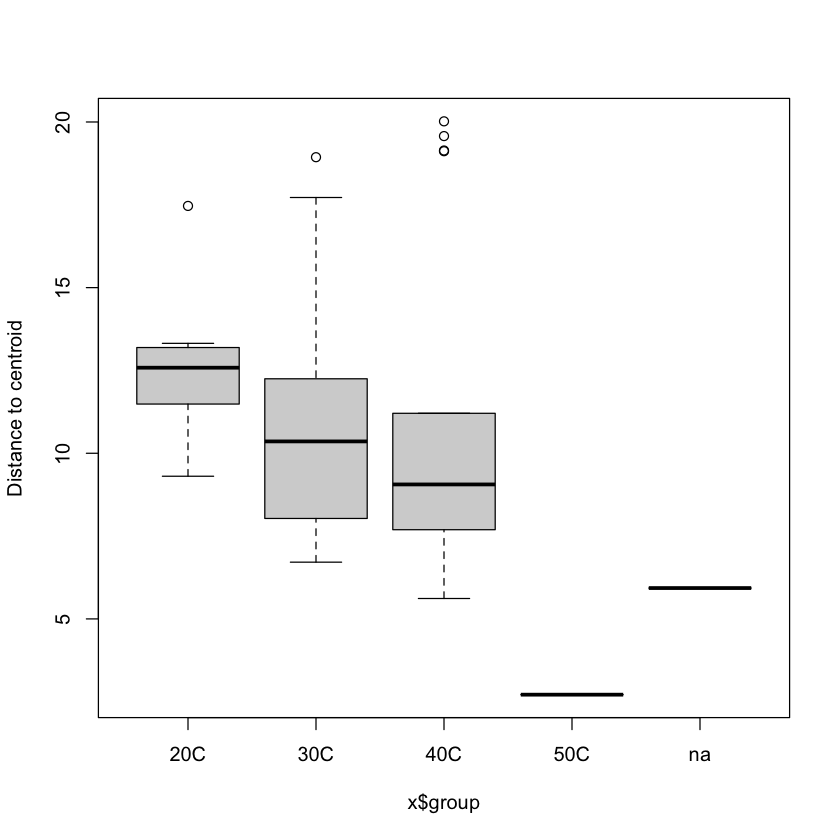

In [37]:
png("betadispr_temp_type.png")
boxplot(dispr)
dev.off()
boxplot(dispr)

In [38]:
dispr <- vegan::betadisper(philr.dist, phyloseq::sample_data(ps.dat.nocont)$Insects)
dispr


	Homogeneity of multivariate dispersions

Call: vegan::betadisper(d = philr.dist, group =
phyloseq::sample_data(ps.dat.nocont)$Insects)

No. of Positive Eigenvalues: 57
No. of Negative Eigenvalues: 0

Average distance to median:
     n      p      y 
14.024  7.980  9.652 

Eigenvalues for PCoA axes:
(Showing 8 of 57 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
2884.0 2465.0 1063.1  546.6  439.1  374.7  319.5  245.1 

In [39]:
permutest(dispr)


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df Sum Sq Mean Sq     F N.Perm Pr(>F)    
Groups     2 352.55 176.277 25.93    999  0.001 ***
Residuals 55 373.89   6.798                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

pdf 
  2

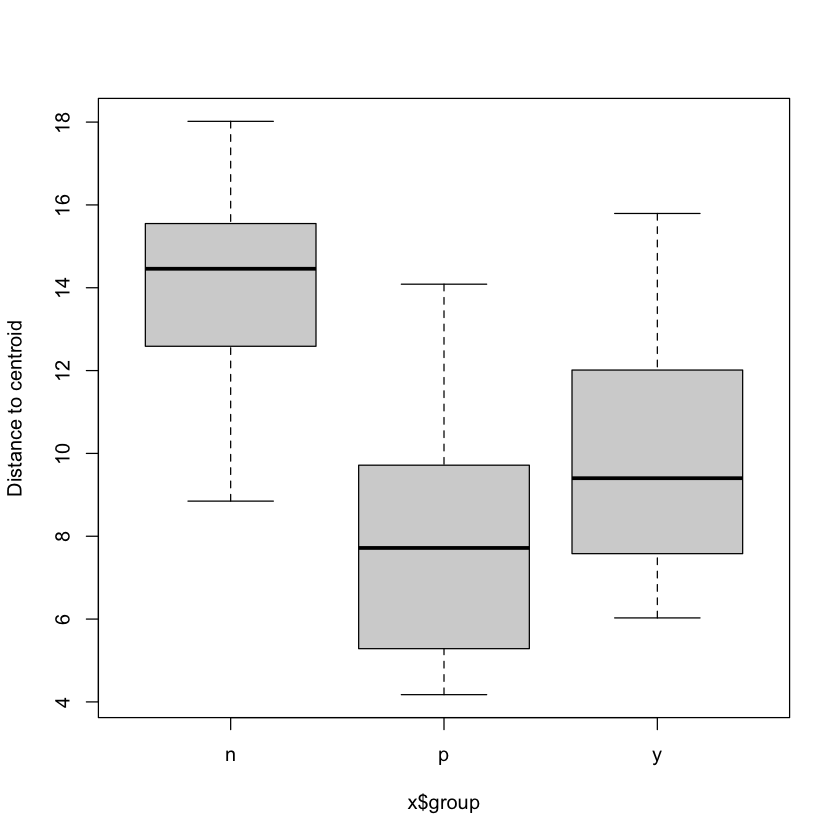

In [40]:
png("betadispr_insect_type.png")
boxplot(dispr)
dev.off()
boxplot(dispr)


	Homogeneity of multivariate dispersions

Call: vegan::betadisper(d = philr.dist, group =
phyloseq::sample_data(ps.dat.nocont)$Days_in_Field)

No. of Positive Eigenvalues: 57
No. of Negative Eigenvalues: 0

Average distance to median:
     7      8     12     18     20     22     24     34     35     67     94 
 8.398  2.900  4.285  6.523  4.231  1.416  2.713  1.195  2.306  4.192  8.543 
   111    159    196    218    244    272 
 9.836  3.660  5.931  2.804  8.857 11.210 

Eigenvalues for PCoA axes:
(Showing 8 of 57 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
2884.0 2465.0 1063.1  546.6  439.1  374.7  319.5  245.1 


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df Sum Sq Mean Sq      F N.Perm Pr(>F)   
Groups    16 512.09  32.006 5.0461    999  0.002 **
Residuals 41 260.05   6.343                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

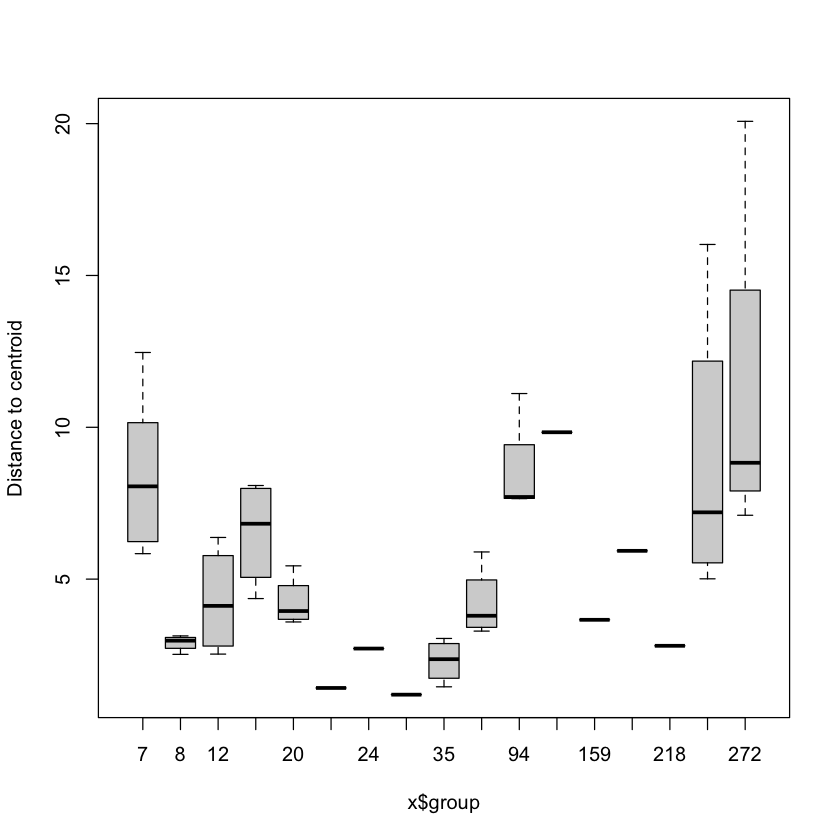

In [65]:
dispr <- vegan::betadisper(philr.dist, phyloseq::sample_data(ps.dat.nocont)$Days_in_Field)
dispr
permutest(dispr)
boxplot(dispr)

### 13. Abundance of specific taxa across temperature groups

,SampleID,Genus,log10Abund,Abundance,Temp_group
,<chr>,<chr>,<dbl>,<int>,<chr>
1,W29A,Clostridium,3.306854,2026,20-25
2,W30E,Clostridium,2.939020,868,20-25
3,W31A,Clostridium,2.260071,181,20-25
4,W32E,Clostridium,2.632457,428,20-25
5,W23A,Clostridium,2.785330,609,25-30
6,W24E,Clostridium,3.164650,1460,25-30



Attaching package: ‘doBy’


The following object is masked from ‘package:dplyr’:

    order_by




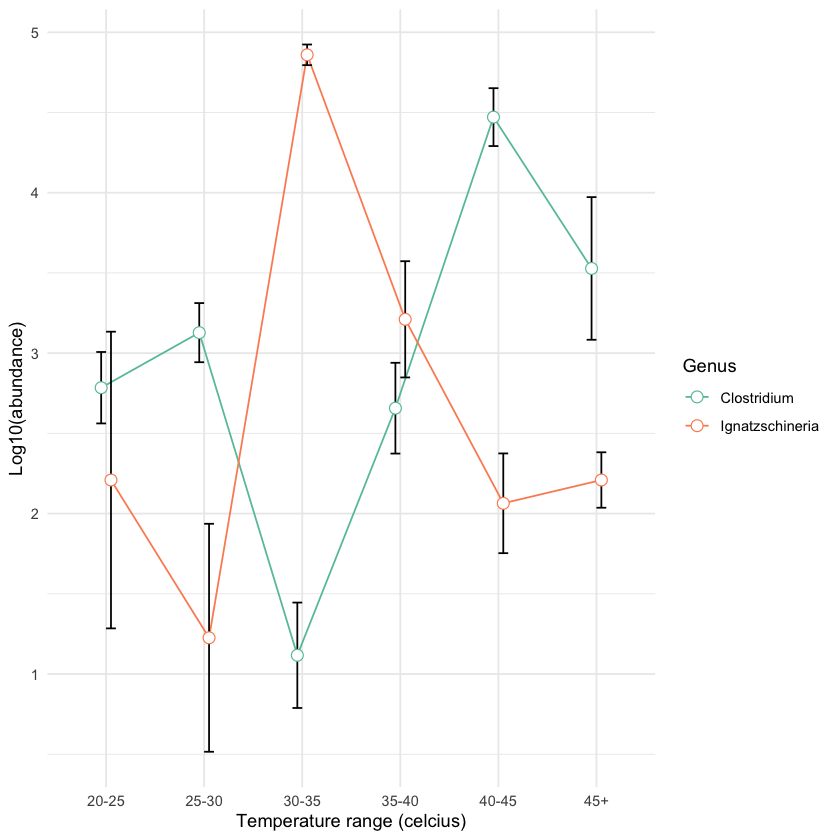

In [41]:
map_abund <- read.table("map_abund.csv", sep=",", header=TRUE)
head(map_abund)
summarySE <- function(data=NULL, measurevar, groupvars=NULL, na.rm=FALSE, conf.interval=.95) {
    library(doBy)

    # New version of length which can handle NA's: if na.rm==T, don't count them
    length2 <- function (x, na.rm=FALSE) {
        if (na.rm) sum(!is.na(x))
        else       length(x)
    }

    # Collapse the data
    formula <- as.formula(paste(measurevar, paste(groupvars, collapse=" + "), sep=" ~ "))
    datac <- summaryBy(formula, data=data, FUN=c(length2,mean,sd), na.rm=na.rm)

    # Rename columns
    names(datac)[ names(datac) == paste(measurevar, ".mean",    sep="") ] <- measurevar
    names(datac)[ names(datac) == paste(measurevar, ".sd",      sep="") ] <- "sd"
    names(datac)[ names(datac) == paste(measurevar, ".length2", sep="") ] <- "N"
    
    datac$se <- datac$sd / sqrt(datac$N)  # Calculate standard error of the mean
    
    # Confidence interval multiplier for standard error
    # Calculate t-statistic for confidence interval: 
    # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
    ciMult <- qt(conf.interval/2 + .5, datac$N-1)
    datac$ci <- datac$se * ciMult
    
    return(datac)
}
pd <- position_dodge(width = 0.2)
tgc <- summarySE(map_abund, measurevar="log10Abund", groupvars=c("Genus","Temp_group"))
ggplot(tgc, aes(x=as.factor(Temp_group), y=log10Abund, colour=Genus, group=Genus)) + geom_line(position=pd) + geom_errorbar(aes(ymin=log10Abund-se, ymax=log10Abund+se), width=.2, position=pd, colour="black") + geom_point(position=pd, size=3, shape=21, fill="white") + theme_minimal() + scale_color_manual(values=c("#66c2a5", "#fc8d62"), labels=c("Clostridium","Ignatzschineria"), name="Genus") + xlab("Temperature range (celcius)") + ylab("Log10(abundance)")

Important genera at the ASV level

In [42]:
# function to summarize data
data_summary <- function(data, varname, groupnames){
  require(plyr)
  summary_func <- function(x, col){
    c(mean = mean(x[[col]], na.rm=TRUE),
      sd = sd(x[[col]], na.rm=TRUE))
  }
  data_sum<-ddply(data, groupnames, .fun=summary_func,
                  varname)
  data_sum <- plyr::rename(data_sum, c("mean" = varname))
 return(data_sum)
}

# remove rare ASVs
rm.rare <- prune_taxa(taxa_sums(ps.dat.nocont) > 5000, ps.dat.nocont)
rel.abund <- transform_sample_counts(rm.rare, function(x) x/sum(x))

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’



First for Clostridium

In [43]:
# get color scale
mycols <- c("#05038f", "#492ea0", "#6f52b1", "#9278c1", "#b29fd1", "#d1c7e1", "#f1f1f1", "#f8d1c7", "#fab29f", "#f89278", "#f27052", "#e94a2d", "#de0000", "#a60000")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’



pdf 
  2

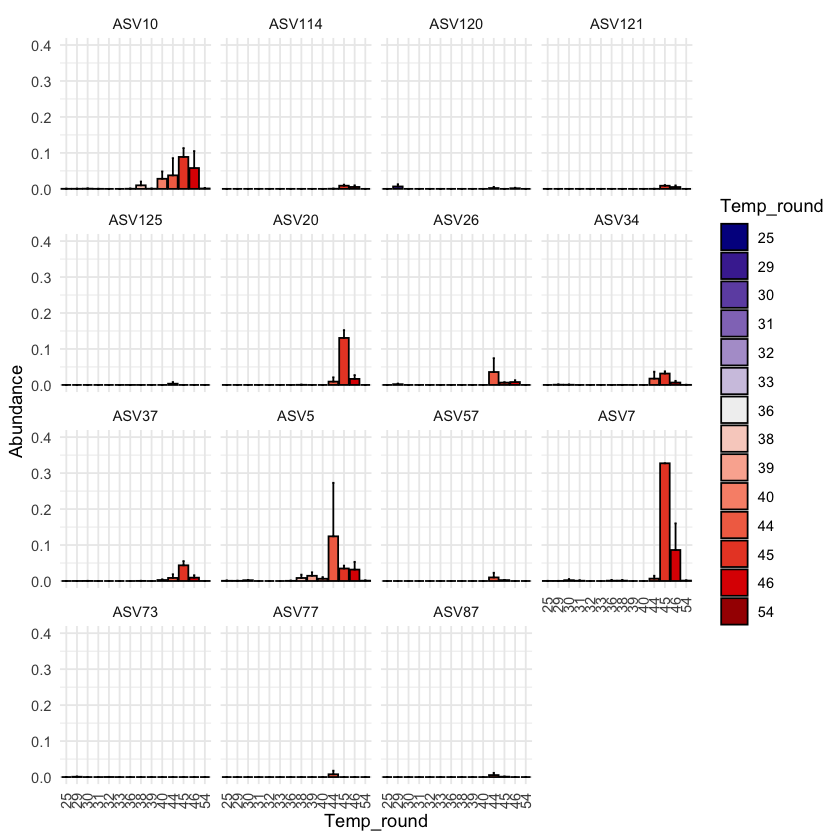

In [44]:
sub.dat <- subset_taxa(rel.abund, V7 == "Clostridium")                     
# need to add asv to taxon table so we can split by it
tax_table(sub.dat)[,1] <- row.names(tax_table(sub.dat))
# get dataframe from phyloseq object
df <- psmelt(sub.dat)

df <- data_summary(df, varname="Abundance", groupnames=c("Temp_round", "OTU"))
df <- df[!grepl("na", df$Temp_round),]
# plot
ggplot(df, aes(x=Temp_round, y=Abundance, fill=Temp_round)) +
    geom_bar(stat="identity", color="black",
    position=position_dodge()) +
    geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
    position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4)) +
    facet_wrap(~OTU) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    scale_fill_manual(values=mycols)
# save
pdf("asv_abund_plot.clostridium.pdf")
ggplot(df, aes(x=Temp_round, y=Abundance, fill=Temp_round)) +
    geom_bar(stat="identity", color="black",
    position=position_dodge()) +
    geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
    position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4)) +
    facet_wrap(~OTU) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    scale_fill_manual(values=mycols)
dev.off()

Ignatzchineria

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Warning message:
“Removed 1 rows containing missing values (geom_bar).”


pdf 
  2

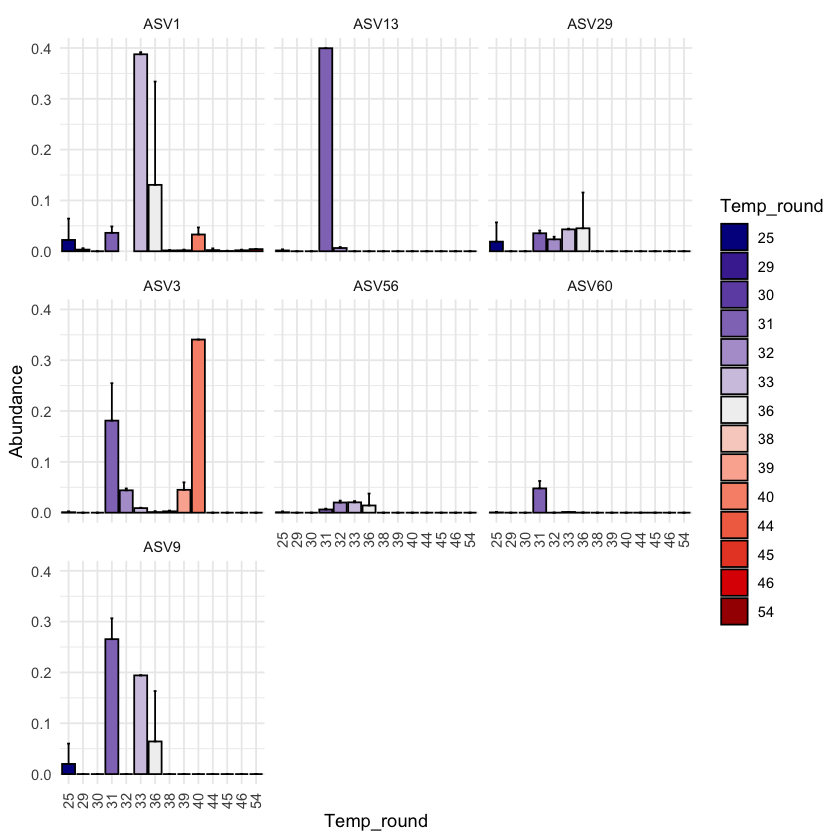

In [45]:
sub.dat <- subset_taxa(rel.abund, V7 == "Ignatzschineria_f_unknown")
                         
# need to add asv to taxon table so we can color by it
tax_table(sub.dat)[,1] <- row.names(tax_table(sub.dat))
# get dataframe from phyloseq object
df <- psmelt(sub.dat)
df <- data_summary(df, varname="Abundance", groupnames=c("Temp_round", "OTU"))
df <- df[!grepl("na", df$Temp_round),]

# plot
ggplot(df, aes(x=Temp_round, y=Abundance, fill=Temp_round)) +
    geom_bar(stat="identity", color="black",
    position=position_dodge()) +
    geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
    position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4)) +
    facet_wrap(~OTU) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    scale_fill_manual(values=mycols)
# save
pdf("asv_abund_plot.ignatzschineria.pdf")
ggplot(df, aes(x=Temp_round, y=Abundance, fill=Temp_round)) +
    geom_bar(stat="identity", color="black",
    position=position_dodge()) +
    geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
    position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4)) +
    facet_wrap(~OTU) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    scale_fill_manual(values=mycols)
dev.off()

Providencia

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’



pdf 
  2

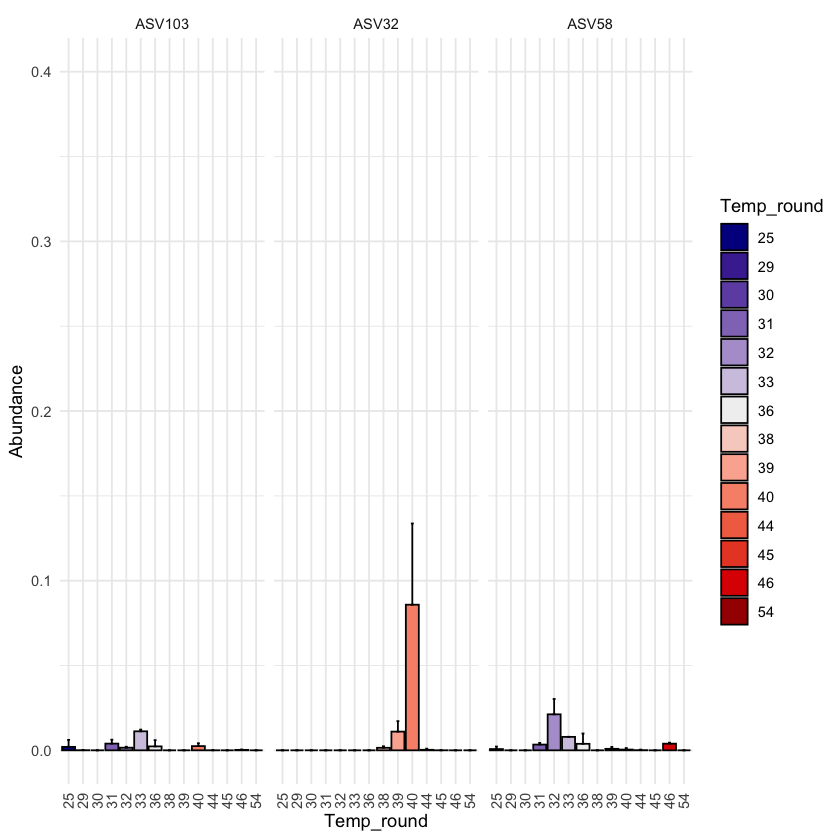

In [46]:
# tax_table(rel.abund)
sub.dat <- subset_taxa(rel.abund, V7 == "Providencia")
                         
# need to add asv to taxon table so we can color by it
tax_table(sub.dat)[,1] <- row.names(tax_table(sub.dat))
# get dataframe from phyloseq object
df <- psmelt(sub.dat)
df <- data_summary(df, varname="Abundance", groupnames=c("Temp_round", "OTU"))
df <- df[!grepl("na", df$Temp_round),]

# plot
ggplot(df, aes(x=Temp_round, y=Abundance, fill=Temp_round)) +
    geom_bar(stat="identity", color="black",
    position=position_dodge()) +
    geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
    position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4)) +
    facet_wrap(~OTU) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    scale_fill_manual(values=mycols)
# save
pdf("asv_abund_plot.providencia.pdf")
ggplot(df, aes(x=Temp_round, y=Abundance, fill=Temp_round)) +
    geom_bar(stat="identity", color="black",
    position=position_dodge()) +
    geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
    position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4)) +
    facet_wrap(~OTU) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    scale_fill_manual(values=mycols)
dev.off()

Lactobacillus

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’



pdf 
  2

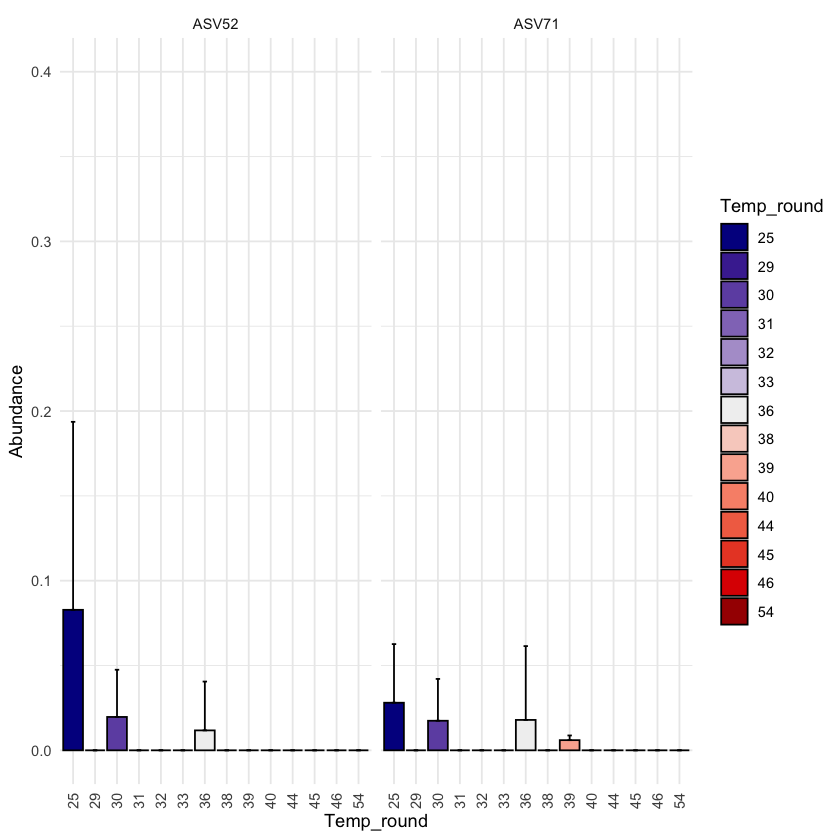

In [47]:
# tax_table(rel.abund)
sub.dat <- subset_taxa(rel.abund, V7 == "Lactobacillus")
                         
# need to add asv to taxon table so we can color by it
tax_table(sub.dat)[,1] <- row.names(tax_table(sub.dat))
# get dataframe from phyloseq object
df <- psmelt(sub.dat)
df <- data_summary(df, varname="Abundance", groupnames=c("Temp_round", "OTU"))
df <- df[!grepl("na", df$Temp_round),]

# plot
ggplot(df, aes(x=Temp_round, y=Abundance, fill=Temp_round)) +
    geom_bar(stat="identity", color="black",
    position=position_dodge()) +
    geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
    position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4)) +
    facet_wrap(~OTU) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    scale_fill_manual(values=mycols)
# save
pdf("asv_abund_plot.lactobacillus.pdf")
ggplot(df, aes(x=Temp_round, y=Abundance, fill=Temp_round)) +
    geom_bar(stat="identity", color="black",
    position=position_dodge()) +
    geom_errorbar(aes(ymin=Abundance, ymax=Abundance+sd), width=.2,
    position=position_dodge(.9)) + theme_minimal() + scale_y_continuous(limits=c(0.0,0.4)) +
    facet_wrap(~OTU) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    scale_fill_manual(values=mycols)
dev.off()

In [48]:
# # this is wonky, the datat isn't formatted correctly, will keep code for future tinkering
# # install.packages("ggridges")
# library(ggridges)

# df <- psmelt(sub.dat)
# df$Temperature_C <- as.numeric(df$Temperature_C)
# df <- na.omit(df)
# df$logAbund <- log10(df$Abundance+1)

# ggplot(df, aes(x=Temperature_C, y=OTU, fill=OTU, group=OTU, height=logAbund)) + 
#     geom_ridgeline(stat="identity", na.rm = TRUE)

### 14. Random Forest analyses
Predictive power of season?

In [49]:
set.seed(21456)
otu_table <- read.table("../01-raw_data_processing/sequence_table.16s.filtered.txt", sep="\t", header=T, row.names=1, stringsAsFactors=F, comment.char="")
otu_table <- t(otu_table)
metadata <- read.table("map.txt", sep="\t", header=T, row.names=1, stringsAsFactors=T, comment.char="")
metadata <- metadata[metadata$Season %in% c("winter", "summer"),]
metadata$Season <- factor(metadata$Season)
otu_nonzero_counts <- apply(otu_table, 1, function(y) sum(length(which(y > 0))))

remove_rare <- function( table , cutoff_pro ) {
  row2keep <- c()
  cutoff <- ceiling( cutoff_pro * ncol(table) )  
  for ( i in 1:nrow(table) ) {
    row_nonzero <- length( which( table[ i , ]  > 0 ) ) 
    if ( row_nonzero > cutoff ) {
      row2keep <- c( row2keep , i)
    }
  }
  return( table [ row2keep , , drop=F ])
}


Call:
 randomForest(x = otu_table_scaled_var[, 1:(ncol(otu_table_scaled_var) -      1)], y = otu_table_scaled_var[, ncol(otu_table_scaled_var)],      ntree = 10000, importance = T, proximity = T) 
               Type of random forest: classification
                     Number of trees: 10000
No. of variables tried at each split: 14

        OOB estimate of  error rate: 6.9%
Confusion matrix:
       summer winter class.error
summer     32      2  0.05882353
winter      2     22  0.08333333

pdf 
  2

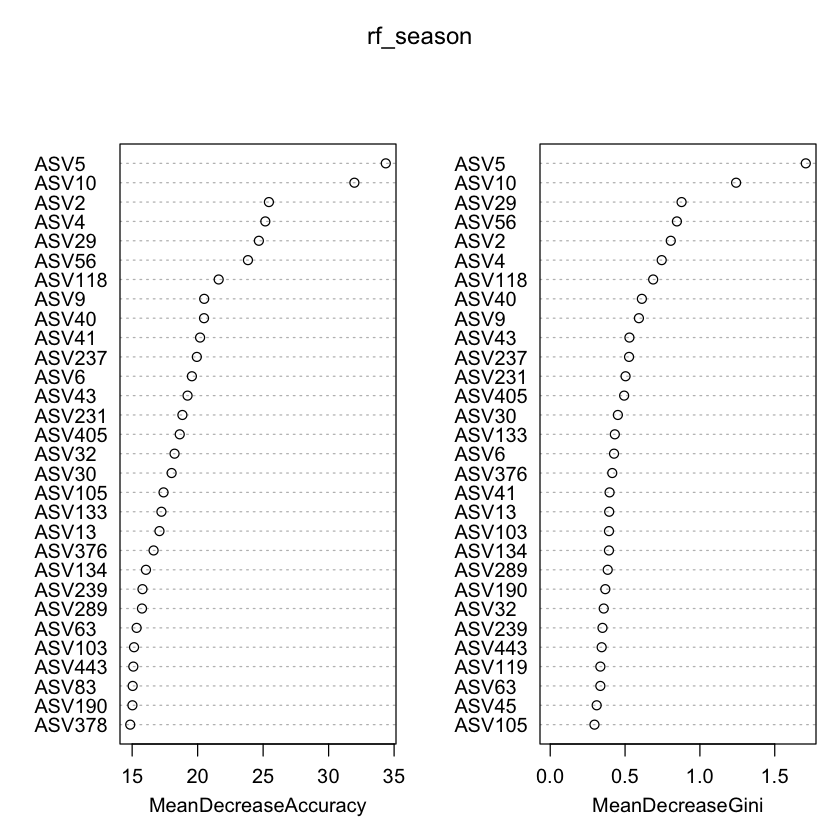

In [50]:
otu_table_rare_removed <- remove_rare(table=otu_table, cutoff_pro=0.1)
otu_table_rare_removed_norm <- sweep(otu_table_rare_removed, 2, colSums(otu_table_rare_removed), '/')*100
otu_table_scaled <- scale(otu_table_rare_removed_norm, center=T, scale=T)
otu_table_scaled_var <- data.frame(t(otu_table_scaled))
otu_table_scaled_var$var <- metadata[rownames(otu_table_scaled_var), "Season"]
set.seed(151)
otu_table_scaled_var <- otu_table_scaled_var %>% filter(!is.na(var))
rf_season <- randomForest(x=otu_table_scaled_var[,1:(ncol(otu_table_scaled_var)-1)], y=otu_table_scaled_var[, ncol(otu_table_scaled_var)], ntree=10000, importance=T, proximity=T)
rf_season
varImpPlot(rf_season)

pdf("rf_season_importance.pdf")
varImpPlot(rf_season)
dev.off()

Season:

    ASV5 Bacteria Firmicutes Clostridia Clostridiales Clostridiaceae Clostridium Clostridium_unknown
    ASV10 Bacteria Firmicutes Clostridia Clostridiales Clostridiaceae Clostridium Clostridium_unknown
    ASV2 Bacteria Firmicutes Bacilli Bacillales Planococcaceae Sporosarcina Sporosarcina_unknown
    ASV4 Bacteria Actinobacteria Actinobacteria_c Corynebacteriales Corynebacteriaceae Corynebacterium Corynebacterium_unknown
    ASV29 Bacteria Proteobacteria Gammaproteobacteria Ignatzschineria_o Ignatzschineria_f Ignatzschineria_f_unknown Ignatzschineria_f_unknown

With metadata included

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”



Call:
 randomForest(formula = Season ~ ., data = temp, mtry = 3, importance = TRUE,      na.action = na.omit) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 0.1005295
                    % Var explained: 58.36

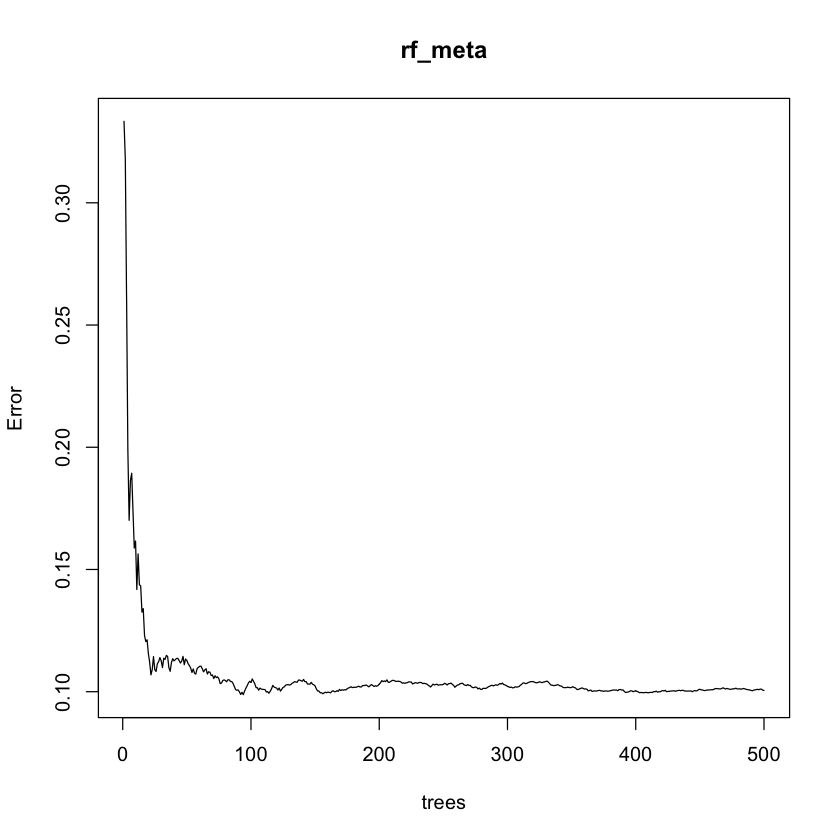

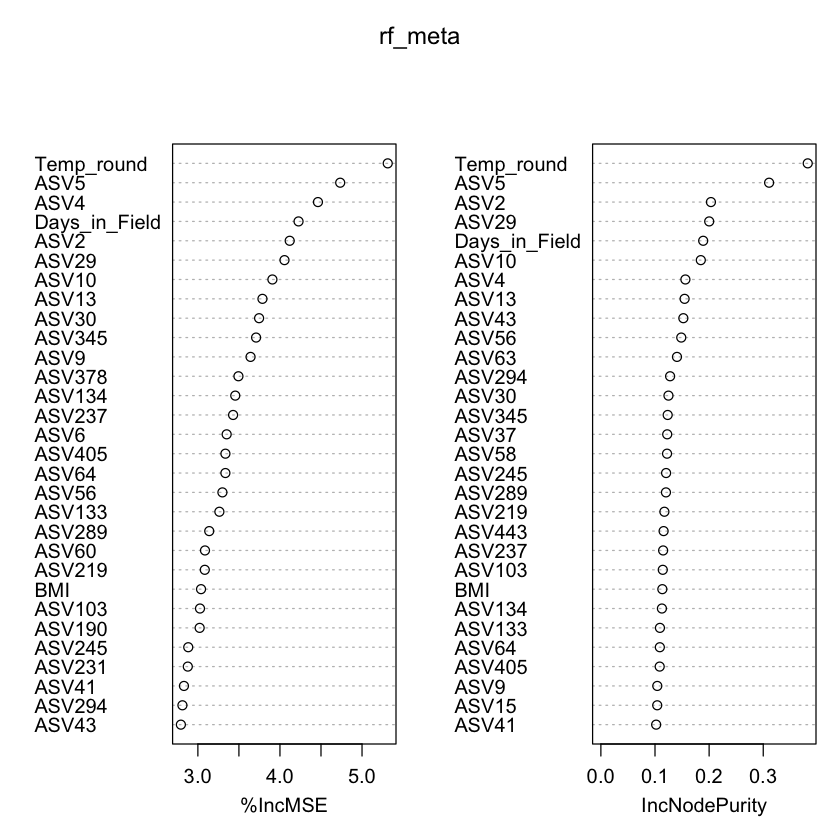

In [51]:
# samples with na values removed, merge with numerically coded metadata
map.reg <- read.table("map.regression.txt", sep="\t", header=T, row.names=1, stringsAsFactors=F, comment.char="")
temp <- t(otu_table_scaled)
temp <- merge(map.reg, temp, by.x = 0, by.y = 0)
row.names(temp) <- temp$Row.names
temp <- temp[,-which(names(temp) == "Row.names")]

rf_meta <- randomForest(Season ~ ., data = temp, mtry = 3,
                         importance = TRUE, na.action = na.omit)
rf_meta
plot(rf_meta)
varImpPlot(rf_meta)

Insects?


Call:
 randomForest(x = otu_table_scaled_var[, 1:(ncol(otu_table_scaled_var) -      1)], y = otu_table_scaled_var[, ncol(otu_table_scaled_var)],      ntree = 10000, importance = T, proximity = T) 
               Type of random forest: classification
                     Number of trees: 10000
No. of variables tried at each split: 14

        OOB estimate of  error rate: 8.62%
Confusion matrix:
   n p  y class.error
n 21 0  3       0.125
p  0 8  2       0.200
y  0 0 24       0.000

pdf 
  2

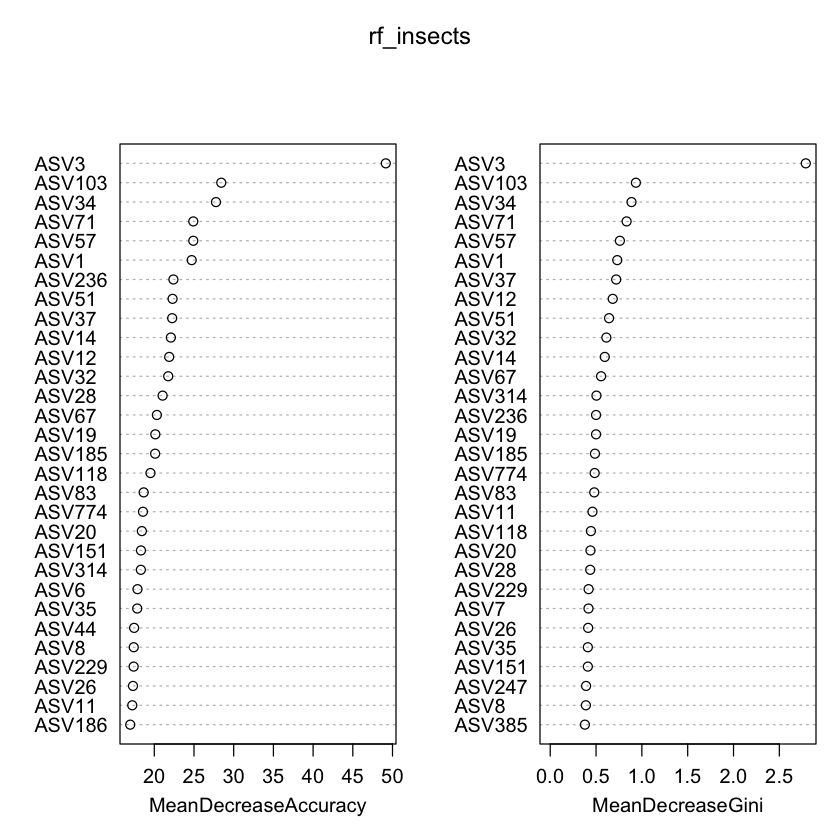

In [52]:
metadata <- read.table("map.txt", sep="\t", header=T, row.names=1, stringsAsFactors=T, comment.char="")
metadata <- metadata[metadata$Insects %in% c("y", "n", "p"),]
metadata$Insects <- factor(metadata$Insects)
otu_table_scaled_var <- data.frame(t(otu_table_scaled))
otu_table_scaled_var$var <- metadata[rownames(otu_table_scaled_var), "Insects"]
set.seed(151)
otu_table_scaled_var <- otu_table_scaled_var %>% filter(!is.na(var))
rf_insects <- randomForest(x=otu_table_scaled_var[,1:(ncol(otu_table_scaled_var)-1)], y=otu_table_scaled_var[, ncol(otu_table_scaled_var)], ntree=10000, importance=T, proximity=T)
rf_insects
pdf("rf_insects_importance.pdf")
varImpPlot(rf_insects)
dev.off()
varImpPlot(rf_insects)

Insects:

    ASV3 Bacteria Proteobacteria Gammaproteobacteria Ignatzschineria_o Ignatzschineria_f Ignatzschineria_f_unknown Ignatzschineria_f_unknown
    ASV103 Proteobacteria Gammaproteobacteria Enterobacterales Morganellaceae Providencia Providencia_unknown
    ASV34 Bacteria Firmicutes Clostridia Clostridiales Clostridiaceae Clostridium Clostridium_unknown
    ASV71 Bacteria Firmicutes Bacilli Lactobacillales Lactobacillaceae Lactobacillus Lactobacillus_unknown
    ASV57 Bacteria Firmicutes Clostridia Clostridiales Clostridiaceae Clostridium Clostridium_unknown


Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”



Call:
 randomForest(formula = Insects ~ ., data = temp, mtry = 3, importance = TRUE,      na.action = na.omit) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 0.4340021
                    % Var explained: 46.74

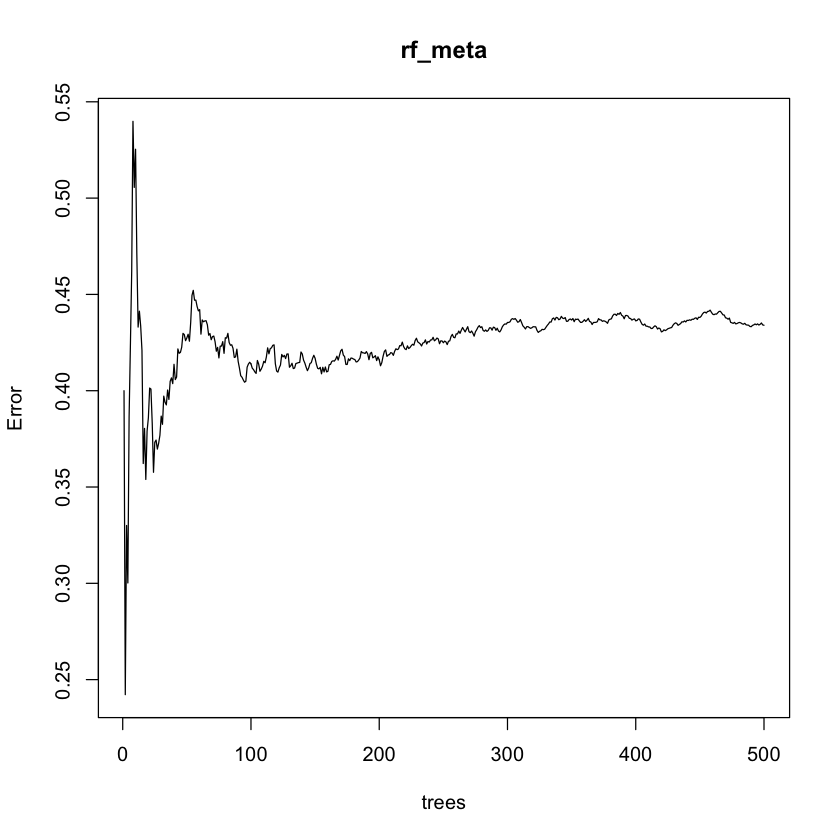

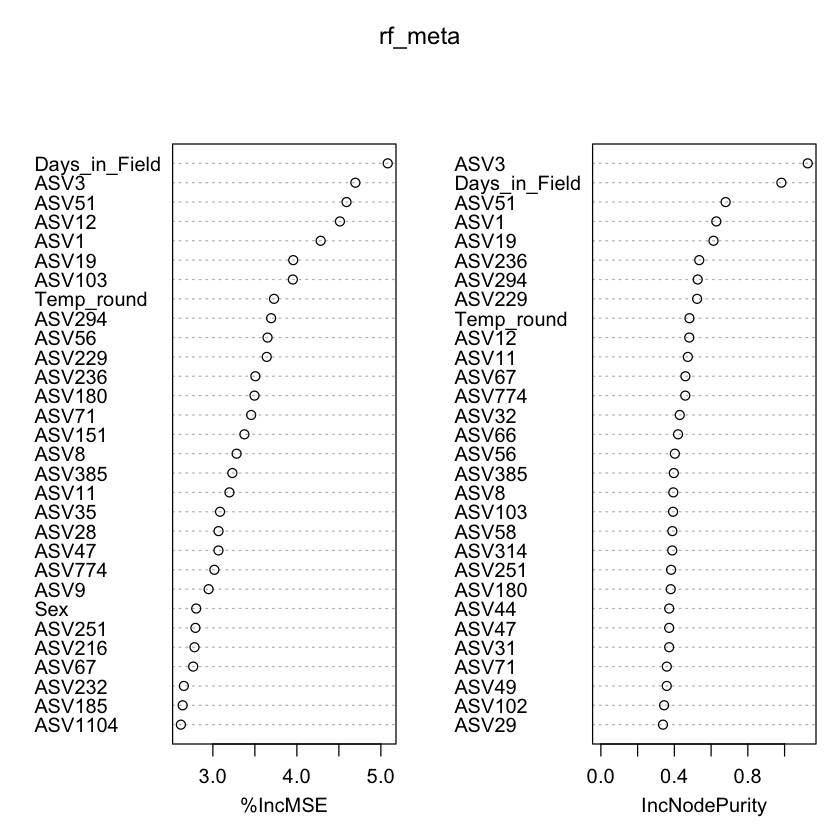

In [53]:
rf_meta <- randomForest(Insects ~ ., data = temp, mtry = 3,
                         importance = TRUE, na.action = na.omit)
rf_meta
plot(rf_meta)
varImpPlot(rf_meta)

Temperature group?

In [54]:
metadata <- read.table("map.txt", sep="\t", header=T, row.names=1, stringsAsFactors=T, comment.char="")
metadata <- metadata[metadata$Temp_group %in% c("20C", "30C", "40C", "50C"),]
metadata$Temp_group <- factor(metadata$Temp_group)
otu_table_scaled_var <- data.frame(t(otu_table_scaled))
otu_table_scaled_var$var <- metadata[rownames(otu_table_scaled_var), "Temp_group"]
set.seed(151)
otu_table_scaled_var <- otu_table_scaled_var %>% filter(!is.na(var))
rf_tgroup <- randomForest(x=otu_table_scaled_var[,1:(ncol(otu_table_scaled_var)-1)], y=otu_table_scaled_var[, ncol(otu_table_scaled_var)], ntree=10000, importance=T, proximity=T)
rf_tgroup


Call:
 randomForest(x = otu_table_scaled_var[, 1:(ncol(otu_table_scaled_var) -      1)], y = otu_table_scaled_var[, ncol(otu_table_scaled_var)],      ntree = 10000, importance = T, proximity = T) 
               Type of random forest: classification
                     Number of trees: 10000
No. of variables tried at each split: 14

        OOB estimate of  error rate: 19.64%
Confusion matrix:
    20C 30C 40C 50C class.error
20C   2   5   1   0  0.75000000
30C   0  26   2   0  0.07142857
40C   0   1  17   0  0.05555556
50C   0   2   0   0  1.00000000

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”



Call:
 randomForest(formula = Season ~ ., data = temp, mtry = 3, importance = TRUE,      na.action = na.omit) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 0.09614156
                    % Var explained: 60.18

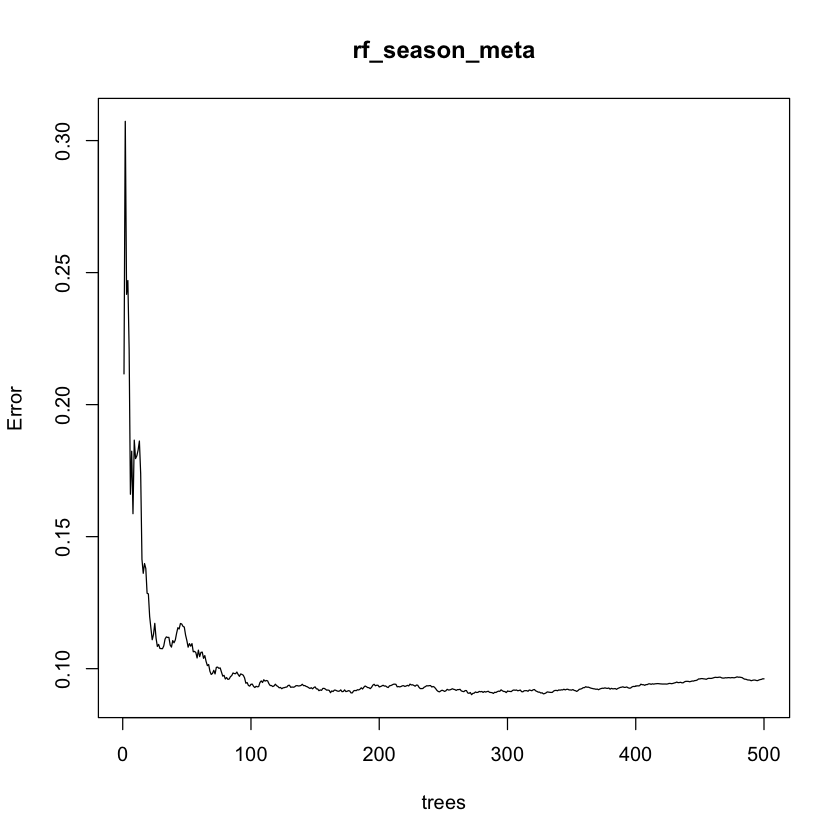

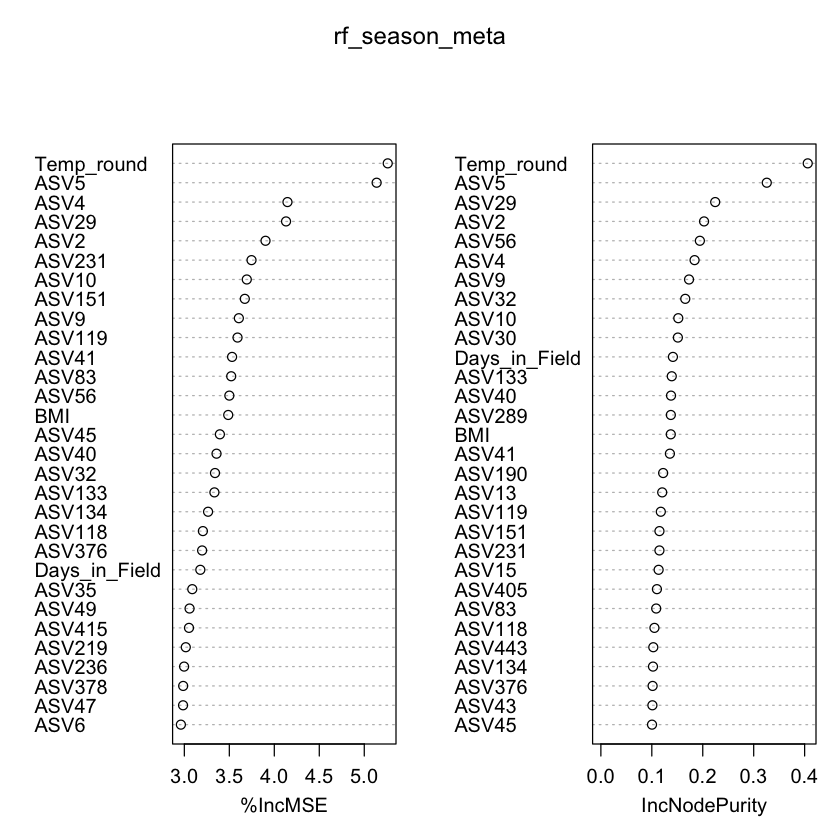

In [55]:
rf_season_meta <- randomForest(Season ~ ., data = temp, mtry = 3,
                         importance = TRUE, na.action = na.omit)
rf_season_meta
plot(rf_season_meta)
varImpPlot(rf_season_meta)

In [56]:
impToPlot.season <- importance(rf_season, scale=F)[,3]
impToPlot.season <- sort(impToPlot.season)
short.imp <- tail(impToPlot.season, 10)
pdf("rf_season_importance.filt.pdf")
dotchart(short.imp, xlim=c(0.00, 0.06))
dev.off()
impToPlot.season <- importance(rf_season, scale=F)[,4]
impToPlot.season <- sort(impToPlot.season)
short.imp <- tail(impToPlot.season, 10)
pdf("rf_season_importance.filt.gini.pdf")
dotchart(short.imp, xlim=c(0.0, 2.5))
dev.off()
impToPlot.insect <- importance(rf_insects, scale=F)[,3]
impToPlot.insect <- sort(impToPlot.insect)
short.imp <- tail(impToPlot.insect, 10)
pdf("rf_insects_importance.filt.pdf")
dotchart(short.imp, xlim=c(0.00, 0.06))
dev.off()
impToPlot.insect <- importance(rf_insects, scale=F)[,4]
impToPlot.insect <- sort(impToPlot.insect)
short.imp <- tail(impToPlot.insect, 10)
pdf("rf_insects_importance.filt.gini.pdf")
dotchart(short.imp, xlim=c(0.0, 2.5))
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

Post mortem interval


Call:
 randomForest(formula = Days_in_Field ~ ., data = temp, mtry = 3,      importance = TRUE, na.action = na.omit) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 6093.54
                    % Var explained: 25.06

pdf 
  2

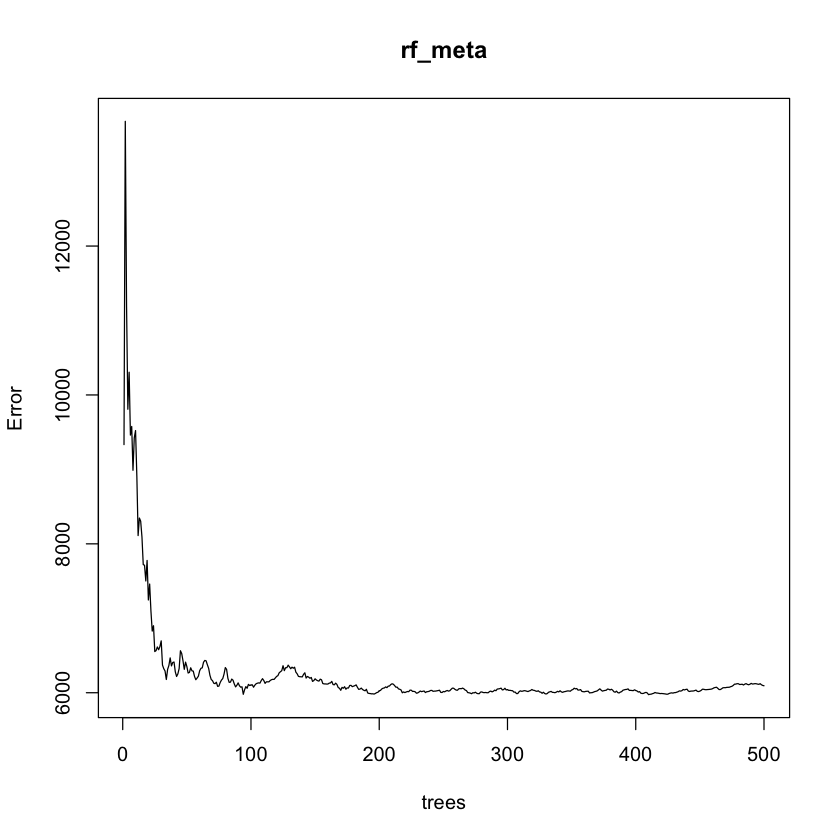

Warning message in names(temp) == c("Season", "Sex", "BMI", "Temp_round", "Insects"):
“longer object length is not a multiple of shorter object length”



Call:
 randomForest(formula = Days_in_Field ~ ., data = pmi, mtry = 3,      importance = TRUE, na.action = na.omit) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 6860.927
                    % Var explained: 15.62

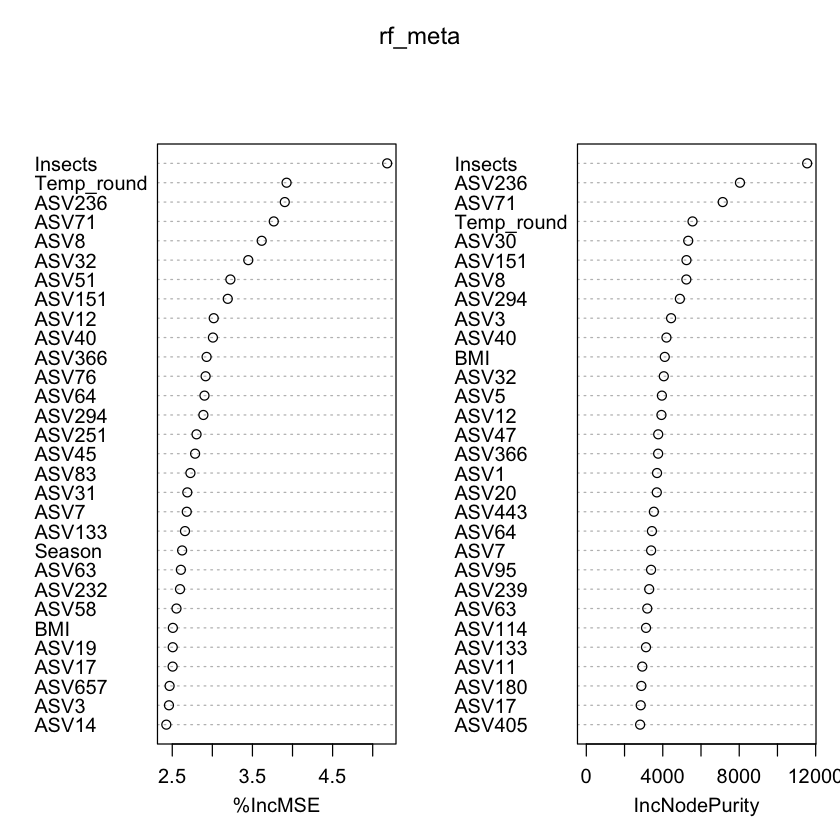

pdf 
  2

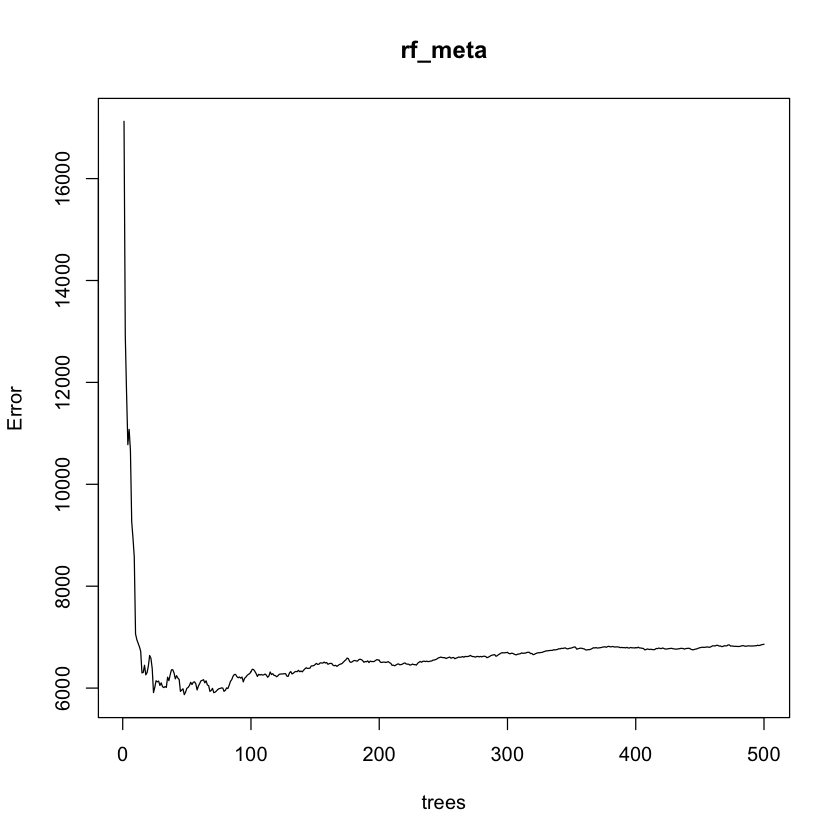

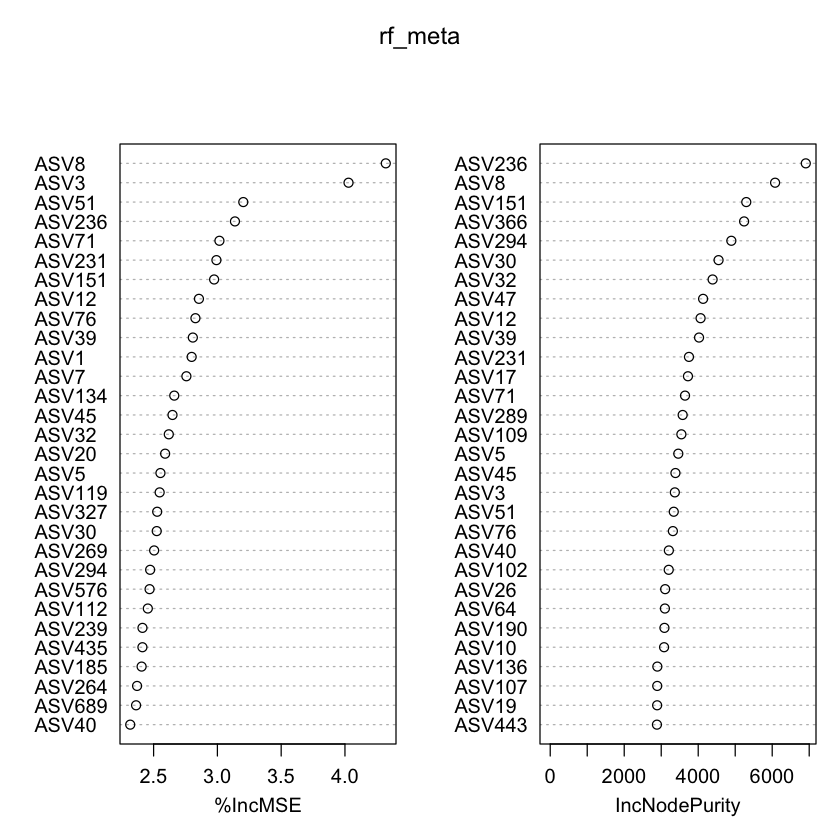

In [57]:
set.seed(456789)
# with metadata
rf_meta <- randomForest(Days_in_Field ~ ., data = temp, mtry = 3,
                         importance = TRUE, na.action = na.omit)
rf_meta
plot(rf_meta)
pdf("random_forest_PMI.importance.meta.pdf")
varImpPlot(rf_meta)
dev.off()
varImpPlot(rf_meta)

# without metadata
pmi <- temp[,-which(names(temp) == c("Season", "Sex", "BMI", "Temp_round", "Insects"))]

rf_meta <- randomForest(Days_in_Field ~ ., data = pmi, mtry = 3,
                         importance = TRUE, na.action = na.omit)
rf_meta
plot(rf_meta)
pdf("random_forest_PMI.importance.pdf")
varImpPlot(rf_meta)
dev.off()
varImpPlot(rf_meta)

### 15. Phylofactor analysis

Warning message in PhyloFactor(asv_tab_diff, tree, x, nfactors = 3):
“Data has zeros and will receive default modification of zeros. Zeros will be replaced column wise with delta*min(x[x>0]), default delta=0.65”


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’



pdf 
  2

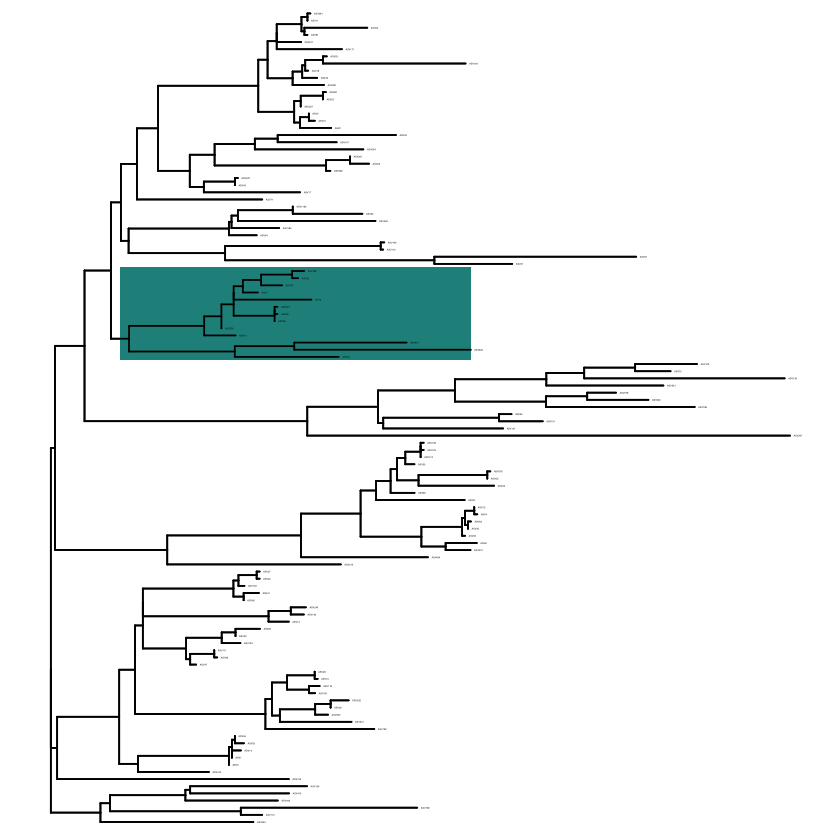

In [58]:
asv_tab_diff <- as.matrix(t(otu_table(ps.dat.nocont)))
filt.list <- colnames(asv_tab_diff)
filtmap <- rawmetadata[rawmetadata$SampleID %in% filt.list,]
filtmap <- filtmap[match(filt.list, filtmap$SampleID),]
tree <- phy_tree(philr.dat)
common.asvs <- which(rowSums(asv_tab_diff>0)>10)
asv_tab_diff <- asv_tab_diff[common.asvs,]
tree <- ape::drop.tip(tree, setdiff(tree$tip.label, rownames(asv_tab_diff)))

x <- as.factor(filtmap$Insects) # variable of interest

pf <- PhyloFactor(asv_tab_diff, tree, x, nfactors=3)
pf$Data <- pf$Data[pf$tree$tip.label,]
gtree <- pf.tree(pf, layout = "rectangular")
pdf("phylofactor_tree.insects.pdf")
gtree$ggplot + geom_tiplab(size=0.5)
dev.off()
gtree$ggplot + geom_tiplab(size=0.5)

pdf 
  2

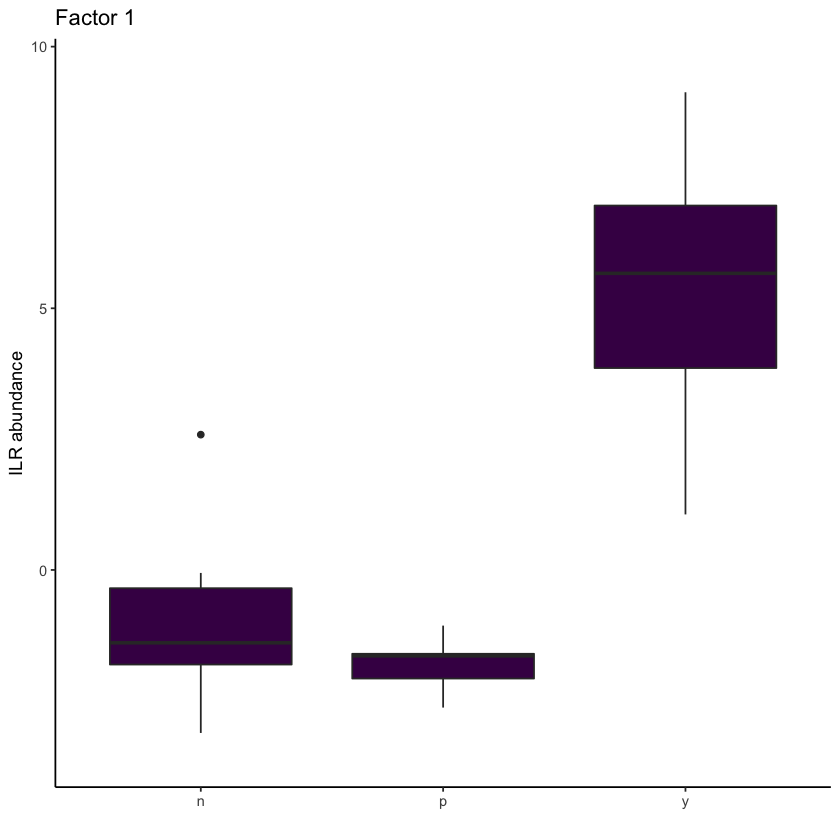

In [59]:
y <- t(pf$basis[,1]) %*% log(pf$Data)
dat <- as.data.frame(cbind(as.matrix(pf$X), (t(y))))
dat$V2 <- as.numeric(as.character(dat$V2))
pdf("factor1_boxplot.insects.pdf")
ggplot(dat, aes(x=V1, y=V2)) + geom_boxplot(fill=gtree$legend$colors[1]) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 1') + ylim(c(-3.5,9.5))
dev.off()
ggplot(dat, aes(x=V1, y=V2)) + geom_boxplot(fill=gtree$legend$colors[1]) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 1') + ylim(c(-3.5,9.5))

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


pdf 
  2

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


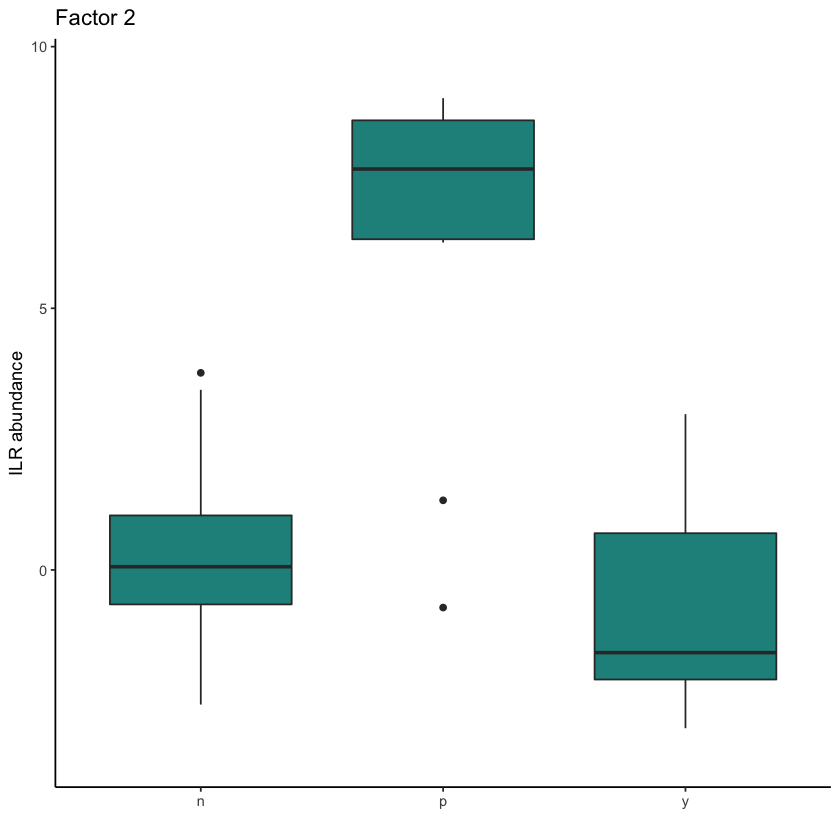

In [60]:
y <- t(pf$basis[,2]) %*% log(pf$Data)
dat <- as.data.frame(cbind(as.matrix(pf$X), (t(y))))
dat$V2 <- as.numeric(as.character(dat$V2))
pdf("factor2_boxplot.insects.pdf")
ggplot(dat, aes(x=V1, y=V2)) + geom_boxplot(fill=gtree$legend$colors[2]) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 2') + ylim(c(-3.5,9.5))
dev.off()
ggplot(dat, aes(x=V1, y=V2)) + geom_boxplot(fill=gtree$legend$colors[2]) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 2') + ylim(c(-3.5,9.5))

pdf 
  2

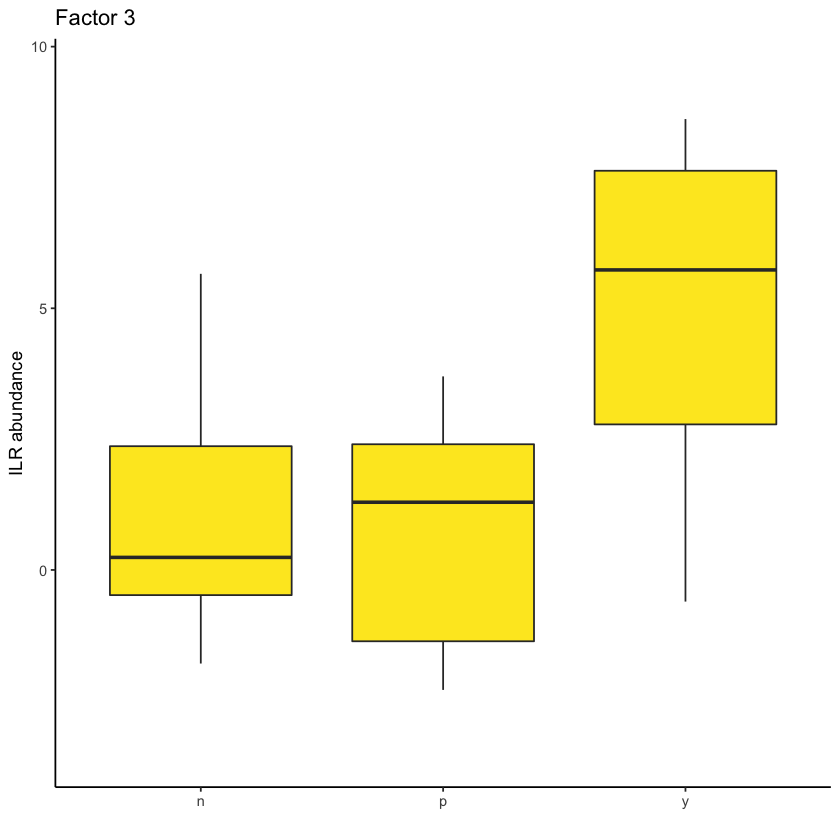

In [61]:
y <- t(pf$basis[,3]) %*% log(pf$Data)
dat <- as.data.frame(cbind(as.matrix(pf$X), (t(y))))
dat$V2 <- as.numeric(as.character(dat$V2))
pdf("factor3_boxplot.insects.pdf")
ggplot(dat, aes(x=V1, y=V2)) + geom_boxplot(fill=gtree$legend$colors[3]) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 3') + ylim(c(-3.5,9.5))
dev.off()
ggplot(dat, aes(x=V1, y=V2)) + geom_boxplot(fill=gtree$legend$colors[3]) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 3') + ylim(c(-3.5,9.5))

Warning message in PhyloFactor(asv_tab_diff, tree, x, nfactors = 3):
“Data has zeros and will receive default modification of zeros. Zeros will be replaced column wise with delta*min(x[x>0]), default delta=0.65”


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’



pdf 
  2

Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”


pdf 
  2

Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”


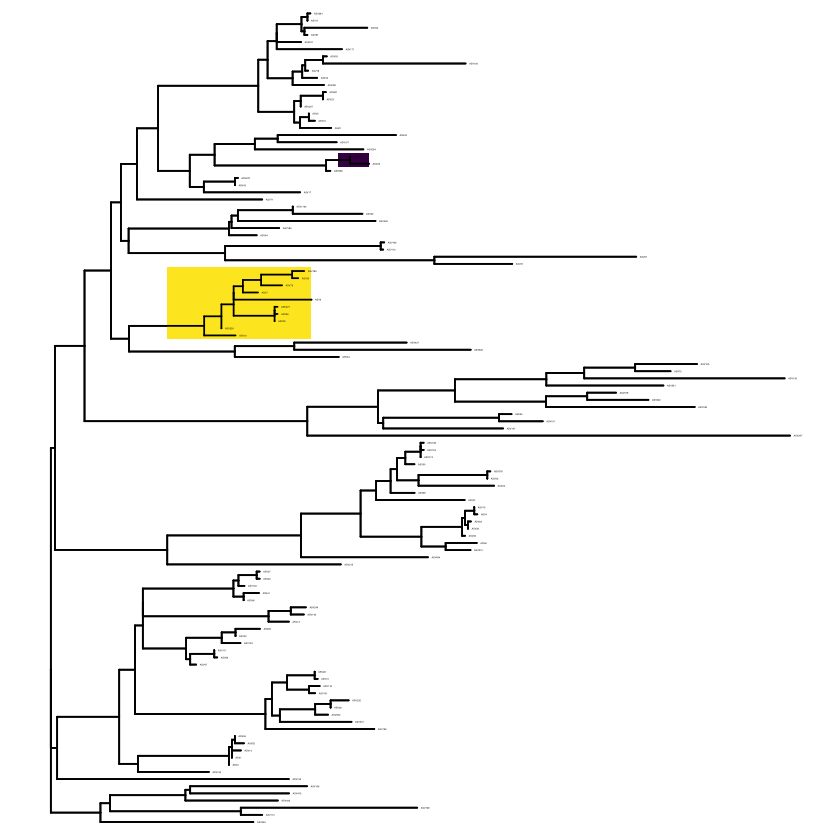

pdf 
  2

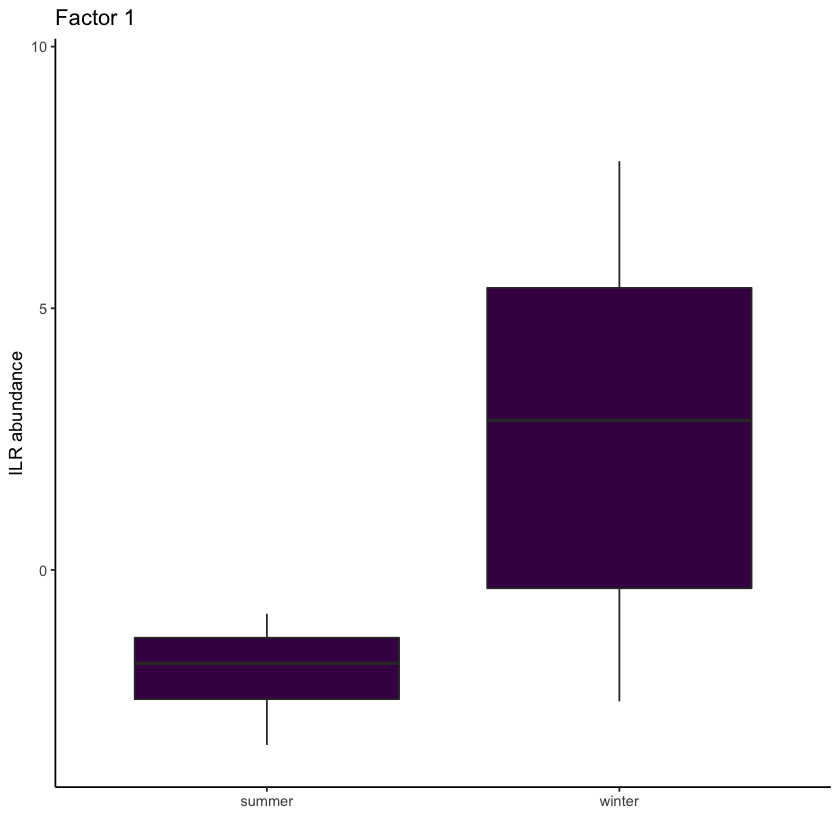

pdf 
  2

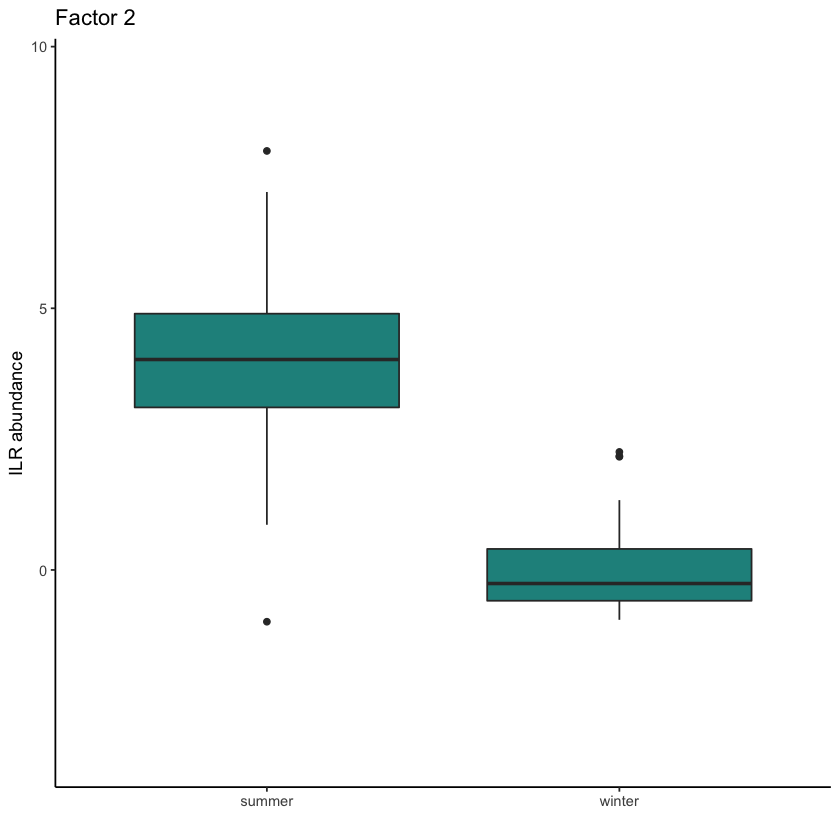

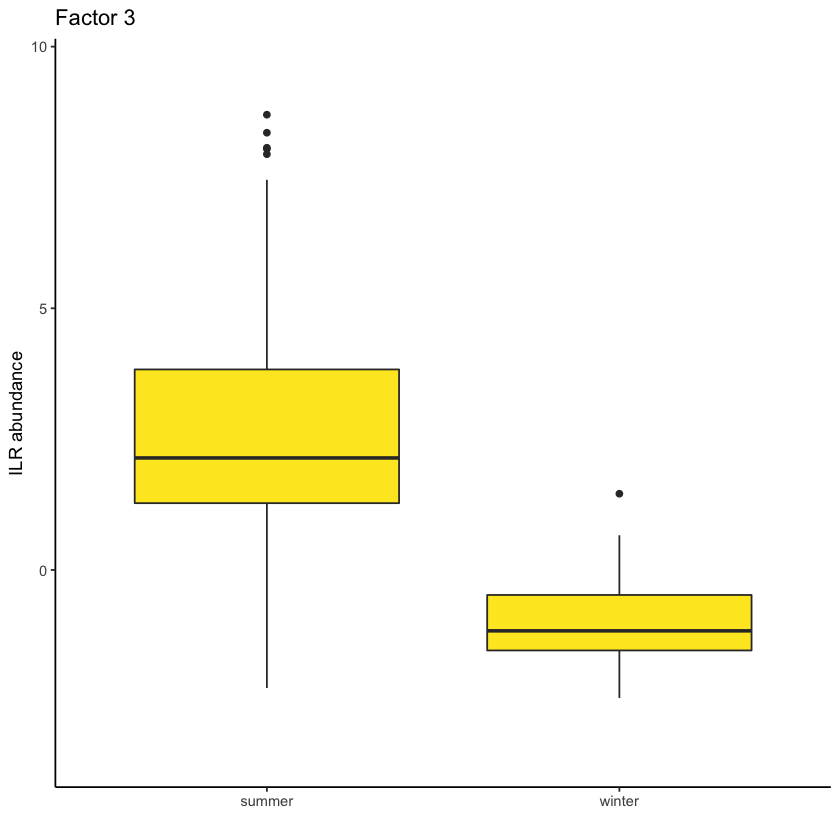

In [62]:
x <- as.factor(filtmap$Season) # variable of interest

pf <- PhyloFactor(asv_tab_diff, tree, x, nfactors=3)
pf$Data <- pf$Data[pf$tree$tip.label,]
gtree <- pf.tree(pf, layout = "rectangular")
pdf("phylofactor_tree.season.pdf")
gtree$ggplot + geom_tiplab(size=0.5)
dev.off()
gtree$ggplot + geom_tiplab(size=0.5)
# boxplots
y <- t(pf$basis[,1]) %*% log(pf$Data)
dat <- as.data.frame(cbind(as.matrix(pf$X), (t(y))))
dat$V2 <- as.numeric(as.character(dat$V2))
pdf("factor1_boxplot.season.pdf")
ggplot(dat, aes(x=V1, y=V2)) + geom_boxplot(fill=gtree$legend$colors[1]) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 1') + ylim(c(-3.5,9.5))
dev.off()
ggplot(dat, aes(x=V1, y=V2)) + geom_boxplot(fill=gtree$legend$colors[1]) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 1') + ylim(c(-3.5,9.5))
y <- t(pf$basis[,2]) %*% log(pf$Data)
dat <- as.data.frame(cbind(as.matrix(pf$X), (t(y))))
dat$V2 <- as.numeric(as.character(dat$V2))
pdf("factor2_boxplot.season.pdf")
ggplot(dat, aes(x=V1, y=V2)) + geom_boxplot(fill=gtree$legend$colors[2]) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 2') + ylim(c(-3.5,9.5))
dev.off()
ggplot(dat, aes(x=V1, y=V2)) + geom_boxplot(fill=gtree$legend$colors[2]) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 2') + ylim(c(-3.5,9.5))
y <- t(pf$basis[,3]) %*% log(pf$Data)
dat <- as.data.frame(cbind(as.matrix(pf$X), (t(y))))
dat$V2 <- as.numeric(as.character(dat$V2))
pdf("factor3_boxplot.season.pdf")
ggplot(dat, aes(x=V1, y=V2)) + geom_boxplot(fill=gtree$legend$colors[3]) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 3') + ylim(c(-3.5,9.5))
dev.off()
ggplot(dat, aes(x=V1, y=V2)) + geom_boxplot(fill=gtree$legend$colors[3]) + theme_classic() + ylab("ILR abundance") + xlab("") + ggtitle('Factor 3') + ylim(c(-3.5,9.5))